In [1]:
import re
import numpy as np    
import pandas as pd
import datetime as dt  
import pandas_datareader.data as web             

import matplotlib as mpl                         
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from statsmodels import regression
import statsmodels.api as sm
import math
import scipy.optimize as sco
from scipy import optimize

import os

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

In [687]:
os.getcwd()

'/Users/elifriedmann/Downloads'

In [688]:
os.chdir('/Users/elifriedmann/Downloads')

In [5]:
df = pd.read_csv('foia-7a-fy2020-present-asof-241231.csv', parse_dates = True)
df.head()

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/2098706902.py:1: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('foia-7a-fy2020-present-asof-241231.csv', parse_dates = True)


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SoldSecMrktInd
0,12/31/2024,7A,Virtuosity Fitness LLC,16778 Oakmont Avenue,Gaithersburg,MD,20877,"TD Bank, National Association",18409.0,NaN,...,6.0,CORPORATION,"Startup, Loan Funds will Open Business",CHGOFF,NaN,6/14/2024,24566.48,1,5,NaN
1,12/31/2024,7A,Pardon Ventures LLC,318 Illinois Avenue,Maumee,OH,43537,The Huntington National Bank,6560.0,NaN,...,5.0,CORPORATION,"Startup, Loan Funds will Open Business",EXEMPT,NaN,NaN,0.00,1,3,NaN
2,12/31/2024,7A,Assistance Hospice Care Inc.,"1415 E. Colorao St., Suite 207",GLENDALE,CA,91205,Bank of Hope,26610.0,NaN,...,28.0,CORPORATION,Change of Ownership,PIF,4/30/2021,NaN,0.00,0,3,NaN
3,12/31/2024,7A,RED BARN INVESTMENTS LLC,7130 AIRPORT HIGHWAY,HOLLAND,OH,43528,The Huntington National Bank,6560.0,NaN,...,5.0,CORPORATION,Existing or more than 2 years old,PIF,9/30/2024,NaN,0.00,1,3,NaN
4,12/31/2024,7A,Ferrandough's Pizzeria,231 Main St,ATTICA,NY,14011,Manufacturers and Traders Trust Company,588.0,NaN,...,27.0,INDIVIDUAL,Change of Ownership,PIF,10/31/2023,NaN,0.00,0,16,NaN


In [6]:
os.getcwd()

'/Users/elifriedmann/Downloads'

In [7]:
df2 = pd.read_csv('foia-7a-fy2010-fy2019-asof-241231.csv', parse_dates = True)
df2.head()

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/3766873087.py:1: DtypeWarning: Columns (13,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('foia-7a-fy2010-fy2019-asof-241231.csv', parse_dates = True)


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,CongressionalDistrict,SBADistrictOffice.1,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SoldSecMrktInd
0,12/31/2024,7A,Todd McNiff M.D. P.C.,314 W 14th St Fl 5,NEW YORK,NY,10014,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,CORPORATION,NaN,PIF,1/31/2017,NaN,0.0,1,2.0,NaN
1,12/31/2024,7A,Larry Roach LMHC,204 S Dillard St,WINTER GARDEN,FL,34787,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,INDIVIDUAL,NaN,CANCLD,NaN,NaN,0.0,0,2.0,NaN
2,12/31/2024,7A,Petz Place LLC,3690 W Estrella Parkway #101-1,GOODYEAR,AZ,85338,"JPMorgan Chase Bank, National Association",628.0,NaN,...,3.0,CORPORATION,NaN,PIF,11/30/2017,NaN,0.0,1,15.0,NaN
3,12/31/2024,7A,Phoenix Triad Inc.,5020 Burnet Rd,AUSTIN,TX,78756,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,CORPORATION,NaN,CANCLD,NaN,NaN,0.0,0,42.0,NaN
4,12/31/2024,7A,Quentin O Ade,1558 York Ave Apt 1A,NEW YORK,NY,10028,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,INDIVIDUAL,NaN,PIF,12/31/2014,NaN,0.0,1,3.0,NaN


In [8]:
df['Program'].value_counts()

Program
 7A    289431
Name: count, dtype: int64

In [9]:
df=df.drop(['AsOfDate','Program'], axis=1)
df

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,BankStreet,BankCity,...,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SoldSecMrktInd
0,Virtuosity Fitness LLC,16778 Oakmont Avenue,Gaithersburg,MD,20877,"TD Bank, National Association",18409.0,NaN,2035 Limestone Rd,WILMINGTON,...,6.0,CORPORATION,"Startup, Loan Funds will Open Business",CHGOFF,NaN,6/14/2024,24566.48,1,5,NaN
1,Pardon Ventures LLC,318 Illinois Avenue,Maumee,OH,43537,The Huntington National Bank,6560.0,NaN,17 S High St.,COLUMBUS,...,5.0,CORPORATION,"Startup, Loan Funds will Open Business",EXEMPT,NaN,NaN,0.00,1,3,NaN
2,Assistance Hospice Care Inc.,"1415 E. Colorao St., Suite 207",GLENDALE,CA,91205,Bank of Hope,26610.0,NaN,3200 Wilshire Blvd 1st Fl,LOS ANGELES,...,28.0,CORPORATION,Change of Ownership,PIF,4/30/2021,NaN,0.00,0,3,NaN
3,RED BARN INVESTMENTS LLC,7130 AIRPORT HIGHWAY,HOLLAND,OH,43528,The Huntington National Bank,6560.0,NaN,17 S High St.,COLUMBUS,...,5.0,CORPORATION,Existing or more than 2 years old,PIF,9/30/2024,NaN,0.00,1,3,NaN
4,Ferrandough's Pizzeria,231 Main St,ATTICA,NY,14011,Manufacturers and Traders Trust Company,588.0,NaN,"One M & T Plaza, 15th Fl",BUFFALO,...,27.0,INDIVIDUAL,Change of Ownership,PIF,10/31/2023,NaN,0.00,0,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289426,Superior Power & Light INC.,2303 W MCNAB RD STE 30,POMPANO BEACH,FL,33069,"TD Bank, National Association",18409.0,NaN,2035 Limestone Rd,WILMINGTON,...,20.0,CORPORATION,Existing or more than 2 years old,EXEMPT,NaN,NaN,0.00,1,0,NaN
289427,Tran Automotive Group LLC,2195 BRIARCLIFF RD NE,ATLANTA,GA,30329,Live Oak Banking Company,58665.0,NaN,1741 Tiburon Dr,WILMINGTON,...,4.0,CORPORATION,New Business or 2 years or less,EXEMPT,NaN,NaN,0.00,0,12,Y
289428,Pratts expert roofing and clai,288 Cedar Ridge Rd SE,Dalton,GA,30721,"Newtek Bank, National Association",18734.0,NaN,"1111 Brickell Ave, Ste 135",Miami,...,14.0,CORPORATION,Existing or more than 2 years old,COMMIT,NaN,NaN,0.00,0,200,NaN
289429,TRUST & DEDICATION INC,5717 MAMMOTH LN,COLORADO SPRINGS,CO,80927,"U.S. Bank, National Association",6548.0,NaN,425 Walnut St,CINCINNATI,...,5.0,CORPORATION,New Business or 2 years or less,EXEMPT,NaN,NaN,0.00,0,5,NaN


In [10]:
df['BorrName'].value_counts()

BorrName
Arlmont Fuel Corp.                30
Anytime Fitness                   27
Comfort Keepers                   22
J & E Inc                         21
Firehouse Subs                    16
                                  ..
Peppermint Creek of Point Plea     1
Frances G. Hodges                  1
DALEY CUSTOM CABINETRY LLC         1
Heritage Metal LLC                 1
TRUST & DEDICATION INC             1
Name: count, Length: 243955, dtype: int64

In [11]:
df['BorrStreet'].value_counts()

BorrStreet
22 Sunnyside Ave                30
1111 Parana                     24
612 SCR 68                      17
10655 Birch                     15
16003 N SUNCREST DR             14
                                ..
1298 W. 82ND ST                  1
2026 GRANT STREET                1
1870 STONEBRIDGE DR, STE 110     1
3152 Little Rd Ste 213           1
5717 MAMMOTH LN                  1
Name: count, Length: 251538, dtype: int64

In [12]:
lloans=df[['ApprovalDate','BorrName','BorrCity','BorrState','BorrZip', 'GrossApproval','NaicsCode','NaicsDescription','LoanStatus']]
lloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,10/15/2019,Virtuosity Fitness LLC,Gaithersburg,MD,20877,25000,713940,Fitness and Recreational Sports Centers,CHGOFF
1,10/15/2019,Pardon Ventures LLC,Maumee,OH,43537,50000,453998,All Other Miscellaneous Store Retailers (excep...,EXEMPT
2,10/15/2019,Assistance Hospice Care Inc.,GLENDALE,CA,91205,370000,621610,Home Health Care Services,PIF
3,10/15/2019,RED BARN INVESTMENTS LLC,HOLLAND,OH,43528,25000,722511,Full-Service Restaurants,PIF
4,10/15/2019,Ferrandough's Pizzeria,ATTICA,NY,14011,190000,722513,Limited-Service Restaurants,PIF
...,...,...,...,...,...,...,...,...,...
289426,10/2/2024,Superior Power & Light INC.,POMPANO BEACH,FL,33069,75000,238210,Electrical Contractors,EXEMPT
289427,10/2/2024,Tran Automotive Group LLC,ATLANTA,GA,30329,3486000,811111,General Automotive Repair,EXEMPT
289428,10/2/2024,Pratts expert roofing and clai,Dalton,GA,30721,500000,236115,New Single-Family Housing Construction (except...,COMMIT
289429,10/2/2024,TRUST & DEDICATION INC,COLORADO SPRINGS,CO,80927,18600,238110,Poured Concrete Foundation and Structure Contr...,EXEMPT


In [13]:
eloans=df2[['ApprovalDate','BorrName','BorrCity','BorrState','BorrZip', 'GrossApproval','NaicsCode','NaicsDescription','LoanStatus']]
eloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,9/11/2010,Todd McNiff M.D. P.C.,NEW YORK,NY,10014,25000,621111.0,Offices of Physicians (except Mental Health Sp...,PIF
1,9/11/2010,Larry Roach LMHC,WINTER GARDEN,FL,34787,10300,624190.0,Other Individual and Family Services,CANCLD
2,9/11/2010,Petz Place LLC,GOODYEAR,AZ,85338,100000,453910.0,Pet and Pet Supplies Stores,PIF
3,9/11/2010,Phoenix Triad Inc.,AUSTIN,TX,78756,206500,722110.0,Full-Service Restaurants,CANCLD
4,9/11/2010,Quentin O Ade,NEW YORK,NY,10028,15000,812990.0,All Other Personal Services,PIF
...,...,...,...,...,...,...,...,...,...
545746,3/22/2019,Tino's LLC,WASHINGTON,DC,20008,200000,722511.0,Full-Service Restaurants,PIF
545747,3/22/2019,SAV-ON SEWER & DRAIN INC,Amityville,NY,11701,50000,238220.0,"Plumbing, Heating, and Air-Conditioning Contra...",EXEMPT
545748,3/22/2019,53 L Beach LLC,LONG BEACH,CA,90805,833000,621210.0,Offices of Dentists,PIF
545749,3/22/2019,Advanced Oil Solutions LLC,Albuquerque,NM,87111,150000,811191.0,Automotive Oil Change and Lubrication Shops,EXEMPT


In [14]:
eloans["ApprovalDate"].mode()

0    7/28/2015
Name: ApprovalDate, dtype: object

In [15]:
eloans["ApprovalDate"]=pd.to_datetime(eloans["ApprovalDate"])


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/3401975490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eloans["ApprovalDate"]=pd.to_datetime(eloans["ApprovalDate"])


In [16]:
eloans = eloans[eloans["ApprovalDate"] >= pd.to_datetime("2015-01-01")]

In [17]:
eloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
243525,2015-09-11,ARYANKUMAR LLC,ARAB,AL,35016,1245000,721110.0,Hotels (except Casino Hotels) and Motels,EXEMPT
243526,2015-09-11,Samuel Ramirez,DODGE CITY,KS,67801,20800,484230.0,Specialized Freight (except Used Goods) Trucki...,PIF
243527,2015-09-11,Reuben Graber,Hillpoint,WI,53937,30000,236115.0,New Single-Family Housing Construction (except...,CANCLD
243528,2015-09-11,Village Grill 3 Inc,ROYAL OAK,MI,48067,50300,722511.0,Full-Service Restaurants,PIF
243529,2015-09-11,SJC Telecom Inc.,BROOKLYN,NY,11220,31500,423690.0,Other Electronic Parts and Equipment Merchant ...,PIF
...,...,...,...,...,...,...,...,...,...
545746,2019-03-22,Tino's LLC,WASHINGTON,DC,20008,200000,722511.0,Full-Service Restaurants,PIF
545747,2019-03-22,SAV-ON SEWER & DRAIN INC,Amityville,NY,11701,50000,238220.0,"Plumbing, Heating, and Air-Conditioning Contra...",EXEMPT
545748,2019-03-22,53 L Beach LLC,LONG BEACH,CA,90805,833000,621210.0,Offices of Dentists,PIF
545749,2019-03-22,Advanced Oil Solutions LLC,Albuquerque,NM,87111,150000,811191.0,Automotive Oil Change and Lubrication Shops,EXEMPT


In [18]:
dfp=pd.to_datetime(lloans["ApprovalDate"])
lloans["ApprovalDate"]=dfp

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/3870598920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans["ApprovalDate"]=dfp


In [19]:
lloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,2019-10-15,Virtuosity Fitness LLC,Gaithersburg,MD,20877,25000,713940,Fitness and Recreational Sports Centers,CHGOFF
1,2019-10-15,Pardon Ventures LLC,Maumee,OH,43537,50000,453998,All Other Miscellaneous Store Retailers (excep...,EXEMPT
2,2019-10-15,Assistance Hospice Care Inc.,GLENDALE,CA,91205,370000,621610,Home Health Care Services,PIF
3,2019-10-15,RED BARN INVESTMENTS LLC,HOLLAND,OH,43528,25000,722511,Full-Service Restaurants,PIF
4,2019-10-15,Ferrandough's Pizzeria,ATTICA,NY,14011,190000,722513,Limited-Service Restaurants,PIF
...,...,...,...,...,...,...,...,...,...
289426,2024-10-02,Superior Power & Light INC.,POMPANO BEACH,FL,33069,75000,238210,Electrical Contractors,EXEMPT
289427,2024-10-02,Tran Automotive Group LLC,ATLANTA,GA,30329,3486000,811111,General Automotive Repair,EXEMPT
289428,2024-10-02,Pratts expert roofing and clai,Dalton,GA,30721,500000,236115,New Single-Family Housing Construction (except...,COMMIT
289429,2024-10-02,TRUST & DEDICATION INC,COLORADO SPRINGS,CO,80927,18600,238110,Poured Concrete Foundation and Structure Contr...,EXEMPT


In [20]:
l=[lloans,eloans]
for z in l:
    for i in z.index:
        z.loc[i, "GrossApproval"]=float(z.loc[i, "GrossApproval"])

In [21]:
for z in l:
    z["BorrZip"] = z["BorrZip"].astype(str).str.zfill(5)
    for i in z.index:
        z.loc[i, "NaicsCode"]=str(z.loc[i, "NaicsCode"])

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/2485237450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z["BorrZip"] = z["BorrZip"].astype(str).str.zfill(5)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/2485237450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z["BorrZip"] = z["BorrZip"].astype(str).str.zfill(5)


In [22]:
lloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,2019-10-15,Virtuosity Fitness LLC,Gaithersburg,MD,20877,25000,713940,Fitness and Recreational Sports Centers,CHGOFF
1,2019-10-15,Pardon Ventures LLC,Maumee,OH,43537,50000,453998,All Other Miscellaneous Store Retailers (excep...,EXEMPT
2,2019-10-15,Assistance Hospice Care Inc.,GLENDALE,CA,91205,370000,621610,Home Health Care Services,PIF
3,2019-10-15,RED BARN INVESTMENTS LLC,HOLLAND,OH,43528,25000,722511,Full-Service Restaurants,PIF
4,2019-10-15,Ferrandough's Pizzeria,ATTICA,NY,14011,190000,722513,Limited-Service Restaurants,PIF
...,...,...,...,...,...,...,...,...,...
289426,2024-10-02,Superior Power & Light INC.,POMPANO BEACH,FL,33069,75000,238210,Electrical Contractors,EXEMPT
289427,2024-10-02,Tran Automotive Group LLC,ATLANTA,GA,30329,3486000,811111,General Automotive Repair,EXEMPT
289428,2024-10-02,Pratts expert roofing and clai,Dalton,GA,30721,500000,236115,New Single-Family Housing Construction (except...,COMMIT
289429,2024-10-02,TRUST & DEDICATION INC,COLORADO SPRINGS,CO,80927,18600,238110,Poured Concrete Foundation and Structure Contr...,EXEMPT


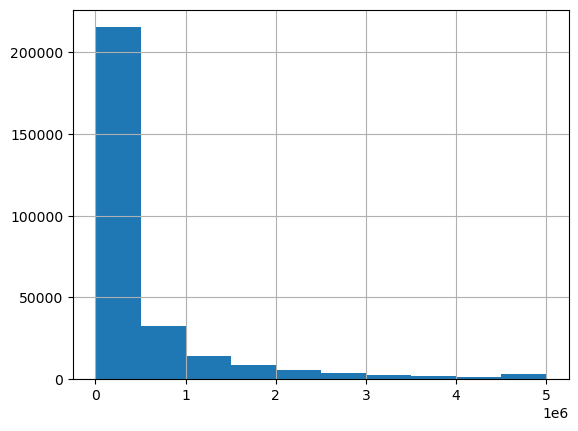

In [23]:
lloans['GrossApproval'].hist();

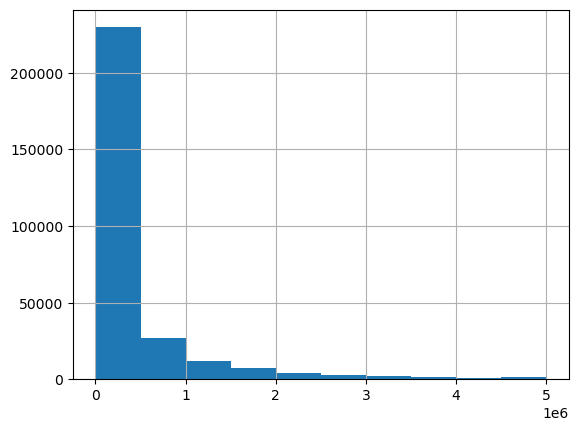

In [24]:
eloans['GrossApproval'].hist();

In [25]:
lloans['NaicsCode'].value_counts()

NaicsCode
722511    13177
722513     9671
484121     5969
236118     5806
713940     5303
          ...  
322130        1
315999        1
111333        1
532291        1
212390        1
Name: count, Length: 1146, dtype: int64

In [26]:
for z in l:
    for i in z.index:
        z.loc[i, "BorrZip"]=str(z.loc[i, "BorrZip"])
        z.loc[i, "NaicsCode"]=str(str(z.loc[i,"NaicsCode"]).split(".")[0])

In [27]:
eloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
243525,2015-09-11,ARYANKUMAR LLC,ARAB,AL,35016,1245000,721110,Hotels (except Casino Hotels) and Motels,EXEMPT
243526,2015-09-11,Samuel Ramirez,DODGE CITY,KS,67801,20800,484230,Specialized Freight (except Used Goods) Trucki...,PIF
243527,2015-09-11,Reuben Graber,Hillpoint,WI,53937,30000,236115,New Single-Family Housing Construction (except...,CANCLD
243528,2015-09-11,Village Grill 3 Inc,ROYAL OAK,MI,48067,50300,722511,Full-Service Restaurants,PIF
243529,2015-09-11,SJC Telecom Inc.,BROOKLYN,NY,11220,31500,423690,Other Electronic Parts and Equipment Merchant ...,PIF
...,...,...,...,...,...,...,...,...,...
545746,2019-03-22,Tino's LLC,WASHINGTON,DC,20008,200000,722511,Full-Service Restaurants,PIF
545747,2019-03-22,SAV-ON SEWER & DRAIN INC,Amityville,NY,11701,50000,238220,"Plumbing, Heating, and Air-Conditioning Contra...",EXEMPT
545748,2019-03-22,53 L Beach LLC,LONG BEACH,CA,90805,833000,621210,Offices of Dentists,PIF
545749,2019-03-22,Advanced Oil Solutions LLC,Albuquerque,NM,87111,150000,811191,Automotive Oil Change and Lubrication Shops,EXEMPT


In [28]:
lloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,2019-10-15,Virtuosity Fitness LLC,Gaithersburg,MD,20877,25000,713940,Fitness and Recreational Sports Centers,CHGOFF
1,2019-10-15,Pardon Ventures LLC,Maumee,OH,43537,50000,453998,All Other Miscellaneous Store Retailers (excep...,EXEMPT
2,2019-10-15,Assistance Hospice Care Inc.,GLENDALE,CA,91205,370000,621610,Home Health Care Services,PIF
3,2019-10-15,RED BARN INVESTMENTS LLC,HOLLAND,OH,43528,25000,722511,Full-Service Restaurants,PIF
4,2019-10-15,Ferrandough's Pizzeria,ATTICA,NY,14011,190000,722513,Limited-Service Restaurants,PIF
...,...,...,...,...,...,...,...,...,...
289426,2024-10-02,Superior Power & Light INC.,POMPANO BEACH,FL,33069,75000,238210,Electrical Contractors,EXEMPT
289427,2024-10-02,Tran Automotive Group LLC,ATLANTA,GA,30329,3486000,811111,General Automotive Repair,EXEMPT
289428,2024-10-02,Pratts expert roofing and clai,Dalton,GA,30721,500000,236115,New Single-Family Housing Construction (except...,COMMIT
289429,2024-10-02,TRUST & DEDICATION INC,COLORADO SPRINGS,CO,80927,18600,238110,Poured Concrete Foundation and Structure Contr...,EXEMPT


In [29]:
eloans['NaicsCode'].value_counts()

NaicsCode
722511    15798
722513    10295
484121     5942
713940     5578
721110     4881
          ...  
315239        1
335224        1
449121        1
524130        1
325188        1
Name: count, Length: 1070, dtype: int64

In [30]:
lloans['NaicsDescription'].value_counts()

NaicsDescription
Full-Service Restaurants                              13291
Limited-Service Restaurants                            9738
General Freight Trucking, Long Distance, Truckload     5969
Residential Remodelers                                 5806
Fitness and Recreational Sports Centers                5303
                                                      ...  
All Other Motor Vehicle Parts Manufacturing               1
Other Fuel Dealers                                        1
Voluntary Health Organizations                            1
Other Justice, Public Order, and Safety Activities        1
Mineral Wool Manufacturing                                1
Name: count, Length: 1033, dtype: int64

In [31]:
eloans['NaicsDescription'].value_counts()

NaicsDescription
Full-Service Restaurants                              15810
Limited-Service Restaurants                           10302
General Freight Trucking, Long Distance, Truckload     5942
Fitness and Recreational Sports Centers                5578
Hotels (except Casino Hotels) and Motels               4881
                                                      ...  
Fur-Bearing Animal and Rabbit                             1
Deep Sea Passenger Transportation                         1
Nonwoven Fabric Mills                                     1
Administration of General Economic Programs               1
All Other Basic Inorganic Chemical Manufacturing          1
Name: count, Length: 1037, dtype: int64

In [32]:
eloans.to_csv("loan_info_15-19.csv", index=False)
lloans.to_csv("loan_info_20-24.csv", index=False)


In [42]:
eless3hk = eloans.copy()
lless3hk = lloans.copy()
emore3hk = eloans.copy()
lmore3hk = lloans.copy()
h = [eless3hk, lless3hk]
j = [emore3hk, lmore3hk]

for df in h:
    df.drop(df[df["GrossApproval"] >= 300000].index, inplace=True)




In [49]:
lless3hk.groupby("NaicsCode").agg()

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [224]:
sheetsa= pd.read_excel("20-24 GrossApproval < 300000.xlsx", sheet_name=["NaicsCode+Description", "Zip+City+State", "State","City","NaicsCode+Description+State"])

sheetsa["NaicsCode+Description"].head()



,NaicsCode,NaicsDescription,Count of GrossApproval
0,722511,Full-Service Restaurants,6920.0
1,484121,"General Freight Trucking, Long Distance, Truck...",5281.0
2,236118,Residential Remodelers,5112.0
3,722513,Limited-Service Restaurants,4585.0
4,484110,"General Freight Trucking, Local",3982.0


In [225]:
sheetsb= pd.read_excel("15-19 GrossApproval < 300000.xlsx", sheet_name=["NaicsCode+Description", "Zip+City+State", "State","City","NaicsCode+Description+State"])

sheetsb["NaicsCode+Description"].head()

,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511.0,10166.0
1,Limited-Service Restaurants,722513.0,6289.0
2,"General Freight Trucking, Long Distance, Truck...",484121.0,5736.0
3,Residential Remodelers,236118.0,4681.0
4,"General Freight Trucking, Local",484110.0,4101.0


In [736]:
df1=sheetsb["NaicsCode+Description"]
df2=sheetsa["NaicsCode+Description"]
df1

,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511.0,10166.0
1,Limited-Service Restaurants,722513.0,6289.0
2,"General Freight Trucking, Long Distance, Truck...",484121.0,5736.0
3,Residential Remodelers,236118.0,4681.0
4,"General Freight Trucking, Local",484110.0,4101.0
...,...,...,...
1039,Steel Wire Drawing,331222.0,1.0
1040,Wet Corn Milling,311221.0,1.0
1041,Total,NaN,204863.0
1042,NaN,NaN,NaN


In [737]:
df2

,NaicsCode,NaicsDescription,Count of GrossApproval
0,722511,Full-Service Restaurants,6920.0
1,484121,"General Freight Trucking, Long Distance, Truck...",5281.0
2,236118,Residential Remodelers,5112.0
3,722513,Limited-Service Restaurants,4585.0
4,484110,"General Freight Trucking, Local",3982.0
...,...,...,...
1099,926150,"Regulation, Licensing, and Inspection of Misce...",1.0
1100,928110,National Security,1.0
1101,Total,NaN,173226.0
1102,NaN,NaN,NaN


In [738]:
df1 = df1.loc[:1040]
df1# Keeps rows from index 0 to 100


,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511.0,10166.0
1,Limited-Service Restaurants,722513.0,6289.0
2,"General Freight Trucking, Long Distance, Truck...",484121.0,5736.0
3,Residential Remodelers,236118.0,4681.0
4,"General Freight Trucking, Local",484110.0,4101.0
...,...,...,...
1036,Scale and Balance (except Laboratory) Manufact...,333997.0,1.0
1037,Snack and Nonalcoholic Beverage Bars,722213.0,1.0
1038,Softwood Veneer and Plywood Manufacturing,321212.0,1.0
1039,Steel Wire Drawing,331222.0,1.0


In [739]:
df2 = df2.loc[:1100]
df2

,NaicsCode,NaicsDescription,Count of GrossApproval
0,722511,Full-Service Restaurants,6920.0
1,484121,"General Freight Trucking, Long Distance, Truck...",5281.0
2,236118,Residential Remodelers,5112.0
3,722513,Limited-Service Restaurants,4585.0
4,484110,"General Freight Trucking, Local",3982.0
...,...,...,...
1096,922120,Police Protection,1.0
1097,922190,"Other Justice, Public Order, and Safety Activi...",1.0
1098,926120,Regulation and Administration of Transportatio...,1.0
1099,926150,"Regulation, Licensing, and Inspection of Misce...",1.0


In [740]:
df2["NaicsCode"]=df2["NaicsCode"].astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/3290406157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["NaicsCode"]=df2["NaicsCode"].astype(str)


In [741]:
df1["NaicsCode"]=df1["NaicsCode"].astype(int)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/3758195910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NaicsCode"]=df1["NaicsCode"].astype(int)


In [742]:
df1["NaicsCode"]=df1["NaicsCode"].astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/974089328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NaicsCode"]=df1["NaicsCode"].astype(str)


In [743]:
df1

,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511,10166.0
1,Limited-Service Restaurants,722513,6289.0
2,"General Freight Trucking, Long Distance, Truck...",484121,5736.0
3,Residential Remodelers,236118,4681.0
4,"General Freight Trucking, Local",484110,4101.0
...,...,...,...
1036,Scale and Balance (except Laboratory) Manufact...,333997,1.0
1037,Snack and Nonalcoholic Beverage Bars,722213,1.0
1038,Softwood Veneer and Plywood Manufacturing,321212,1.0
1039,Steel Wire Drawing,331222,1.0


In [744]:
df1["Rank"]=1
for i in df1.index:
    df1.loc[i,"Rank"]=i+1       

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/2163418795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Rank"]=1


In [745]:
df1

,NaicsDescription,NaicsCode,Count of GrossApproval,Rank
0,Full-Service Restaurants,722511,10166.0,1
1,Limited-Service Restaurants,722513,6289.0,2
2,"General Freight Trucking, Long Distance, Truck...",484121,5736.0,3
3,Residential Remodelers,236118,4681.0,4
4,"General Freight Trucking, Local",484110,4101.0,5
...,...,...,...,...
1036,Scale and Balance (except Laboratory) Manufact...,333997,1.0,1037
1037,Snack and Nonalcoholic Beverage Bars,722213,1.0,1038
1038,Softwood Veneer and Plywood Manufacturing,321212,1.0,1039
1039,Steel Wire Drawing,331222,1.0,1040


In [746]:
df2["Rank"]="pending"
for i in df2.index:
    df2.loc[i,"Rank"]=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_22482/1224860793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Rank"]="pending"


In [747]:
df2

,NaicsCode,NaicsDescription,Count of GrossApproval,Rank
0,722511,Full-Service Restaurants,6920.0,1
1,484121,"General Freight Trucking, Long Distance, Truck...",5281.0,2
2,236118,Residential Remodelers,5112.0,3
3,722513,Limited-Service Restaurants,4585.0,4
4,484110,"General Freight Trucking, Local",3982.0,5
...,...,...,...,...
1096,922120,Police Protection,1.0,1097
1097,922190,"Other Justice, Public Order, and Safety Activi...",1.0,1098
1098,926120,Regulation and Administration of Transportatio...,1.0,1099
1099,926150,"Regulation, Licensing, and Inspection of Misce...",1.0,1100


In [748]:
mergeddf=df1.merge(df2,on=['NaicsCode','NaicsDescription'], how='outer')
mergeddf

,NaicsDescription,NaicsCode,Count of GrossApproval_x,Rank_x,Count of GrossApproval_y,Rank_y
0,Full-Service Restaurants,722511,10166.0,1.0,6920.0,1
1,Limited-Service Restaurants,722513,6289.0,2.0,4585.0,4
2,"General Freight Trucking, Long Distance, Truck...",484121,5736.0,3.0,5281.0,2
3,Residential Remodelers,236118,4681.0,4.0,5112.0,3
4,"General Freight Trucking, Local",484110,4101.0,5.0,3982.0,5
...,...,...,...,...,...,...
1164,Voluntary Health Organizations,813212,NaN,NaN,1.0,1094
1165,Executive Offices,921110,NaN,NaN,1.0,1095
1166,Public Finance Activities,921130,NaN,NaN,1.0,1096
1167,"Other Justice, Public Order, and Safety Activi...",922190,NaN,NaN,1.0,1098


In [749]:
k=[]
for i in mergeddf["Rank_y"].index:
    if mergeddf["Rank_y"][i]<51:
        k.append(i)
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 37, 38, 39, 43, 44, 45, 48, 49, 55, 56, 58, 59, 61, 64, 65, 95, 1041]


In [750]:
k[41:]

[55, 56, 58, 59, 61, 64, 65, 95, 1041]

In [751]:
mergeddf_subset = mergeddf.loc[list(range(50)) + k[41:]]


In [752]:
mergeddf_subset

,NaicsDescription,NaicsCode,Count of GrossApproval_x,Rank_x,Count of GrossApproval_y,Rank_y
0,Full-Service Restaurants,722511,10166.0,1.0,6920.0,1
1,Limited-Service Restaurants,722513,6289.0,2.0,4585.0,4
2,"General Freight Trucking, Long Distance, Truck...",484121,5736.0,3.0,5281.0,2
3,Residential Remodelers,236118,4681.0,4.0,5112.0,3
4,"General Freight Trucking, Local",484110,4101.0,5.0,3982.0,5
5,Landscaping Services,561730,3902.0,6.0,3649.0,6
6,Fitness and Recreational Sports Centers,713940,3731.0,7.0,2887.0,10
7,Beauty Salons,812112,3685.0,8.0,3148.0,8
8,"Plumbing, Heating, and Air-Conditioning Contra...",238220,3378.0,9.0,3195.0,7
9,All Other Specialty Trade Contractors,238990,3232.0,10.0,2940.0,9


In [753]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024","Rank_x": "Rank 2015-2019","Rank_y":"Rank 2020-2024"}, inplace=True)





In [755]:
mergeddf_subset.to_excel("NaicsCode+Ranks.xlsx", index=False)

In [226]:
df1=sheetsb["Zip+City+State"]
df2=sheetsa["Zip+City+State"]
df1

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,10001,New York,NY,191.0
1,2360,Plymouth,MA,167.0
2,44256,Medina,OH,137.0
3,1915,Beverly,MA,133.0
4,46143,Greenwood,IN,133.0
...,...,...,...,...
22112,99919,Thorne Bay,AK,1.0
22113,99925,Klawock,AK,1.0
22114,Total,NaN,NaN,204863.0
22115,NaN,NaN,NaN,NaN


In [227]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,10950,Monroe,NY,245.0
1,11219,New York,NY,224.0
2,10977,Spring Valley,NY,223.0
3,10952,Monsey,NY,172.0
4,44256,Medina,OH,169.0
...,...,...,...,...
21114,99829,Hoonah,AK,1.0
21115,99921,Craig,AK,1.0
21116,Total,NaN,NaN,173226.0
21117,NaN,NaN,NaN,NaN


In [229]:
df1=df1.loc[:22113]
df2=df2.loc[:21115]
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,10950,Monroe,NY,245.0
1,11219,New York,NY,224.0
2,10977,Spring Valley,NY,223.0
3,10952,Monsey,NY,172.0
4,44256,Medina,OH,169.0
...,...,...,...,...
21111,99766,Point Hope,AK,1.0
21112,99802,Hoonah,AK,1.0
21113,99827,Haines,AK,1.0
21114,99829,Hoonah,AK,1.0


In [230]:
df1['BorrZip']=df1["BorrZip"].astype(int).astype(str)


In [231]:
df2["BorrZip"]=df2["BorrZip"].astype(int).astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/121724088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BorrZip"]=df2["BorrZip"].astype(int).astype(str)


In [232]:
h=[df1,df2]
for a in h:
    for i in a.index:
        a.loc[i,"BorrZip"]=a.loc[i, "BorrZip"].zfill(5)

In [233]:
df1

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,10001,New York,NY,191.0
1,02360,Plymouth,MA,167.0
2,44256,Medina,OH,137.0
3,01915,Beverly,MA,133.0
4,46143,Greenwood,IN,133.0
...,...,...,...,...
22109,99752,Kotzebue,AK,1.0
22110,99820,Angoon,AK,1.0
22111,99835,Sitka,AK,1.0
22112,99919,Thorne Bay,AK,1.0


In [234]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,10950,Monroe,NY,245.0
1,11219,New York,NY,224.0
2,10977,Spring Valley,NY,223.0
3,10952,Monsey,NY,172.0
4,44256,Medina,OH,169.0
...,...,...,...,...
21111,99766,Point Hope,AK,1.0
21112,99802,Hoonah,AK,1.0
21113,99827,Haines,AK,1.0
21114,99829,Hoonah,AK,1.0


In [235]:
df1['Rank 2015-2019']='pending'
df2['Rank 2020-2024']='pending'
for i in df1.index:
    df1.loc[i,'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i,"Rank 2020-2024"]=i+1
df1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3830440366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']='pending'


,BorrZip,BorrCity,BorrState,Count of GrossApproval,Rank 2015-2019
0,10001,New York,NY,191.0,1
1,02360,Plymouth,MA,167.0,2
2,44256,Medina,OH,137.0,3
3,01915,Beverly,MA,133.0,4
4,46143,Greenwood,IN,133.0,5
...,...,...,...,...,...
22109,99752,Kotzebue,AK,1.0,22110
22110,99820,Angoon,AK,1.0,22111
22111,99835,Sitka,AK,1.0,22112
22112,99919,Thorne Bay,AK,1.0,22113


In [236]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval,Rank 2020-2024
0,10950,Monroe,NY,245.0,1
1,11219,New York,NY,224.0,2
2,10977,Spring Valley,NY,223.0,3
3,10952,Monsey,NY,172.0,4
4,44256,Medina,OH,169.0,5
...,...,...,...,...,...
21111,99766,Point Hope,AK,1.0,21112
21112,99802,Hoonah,AK,1.0,21113
21113,99827,Haines,AK,1.0,21114
21114,99829,Hoonah,AK,1.0,21115


In [237]:
mergeddf=df1.merge(df2,on=['BorrZip','BorrCity','BorrState'], how='outer')
mergeddf

,BorrZip,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,10001,New York,NY,191.0,1,100.0,14
1,02360,Plymouth,MA,167.0,2,74.0,56
2,44256,Medina,OH,137.0,3,169.0,5
3,01915,Beverly,MA,133.0,4,76.0,51
4,46143,Greenwood,IN,133.0,5,97.0,18
...,...,...,...,...,...,...,...
27030,99703,Fort Wainwright,AK,NaN,NaN,1.0,21107
27031,99760,Nenana,AK,NaN,NaN,1.0,21109
27032,99765,Nulato,AK,NaN,NaN,1.0,21111
27033,99766,Point Hope,AK,NaN,NaN,1.0,21112


In [238]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
        
print(k[6:])

[25, 27, 28, 30, 35, 43, 46, 47, 59, 65, 67, 80, 82, 88, 90, 117, 135, 226, 247]


In [239]:
l=list(range(25))
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [240]:
print(l+k[6:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 35, 43, 46, 47, 59, 65, 67, 80, 82, 88, 90, 117, 135, 226, 247]


In [241]:
mergeddf_subset = mergeddf.loc[l+k[6:]]

In [242]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [243]:
mergeddf_subset

,BorrZip,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,10001,New York,NY,191.0,1,100.0,14
1,02360,Plymouth,MA,167.0,2,74.0,56
2,44256,Medina,OH,137.0,3,169.0,5
3,01915,Beverly,MA,133.0,4,76.0,51
4,46143,Greenwood,IN,133.0,5,97.0,18
5,08701,Lakewood,NJ,128.0,6,147.0,7
6,39428,Collins,MS,128.0,7,79.0,45
7,45404,Dayton,OH,128.0,8,19.0,2595
8,75034,Frisco,TX,128.0,9,61.0,120
9,92101,San Diego,CA,128.0,10,72.0,62


In [244]:
mergeddf_subset.to_excel("Zip+CityStates.xlsx", index=False)

In [127]:
df1=sheetsb["State"]
df2=sheetsa["State"]
df1

,BorrState,Count of GrossApproval
0,CA,22911.0
1,NY,16002.0
2,TX,13900.0
3,OH,13343.0
4,FL,10710.0
5,MA,9861.0
6,MI,9183.0
7,PA,7218.0
8,NJ,6647.0
9,IL,6185.0


In [128]:
df2

,Count of GrossApproval,BorrState
0,16773,CA
1,13753,OH
2,12727,NY
3,11740,FL
4,9888,TX
5,8336,MI
6,6372,PA
7,6120,NJ
8,5923,IL
9,5470,MN


In [129]:
df1=df1[:57]
df1

,BorrState,Count of GrossApproval
0,CA,22911.0
1,NY,16002.0
2,TX,13900.0
3,OH,13343.0
4,FL,10710.0
5,MA,9861.0
6,MI,9183.0
7,PA,7218.0
8,NJ,6647.0
9,IL,6185.0


In [130]:
df2=df2[:54]
df2

,Count of GrossApproval,BorrState
0,16773,CA
1,13753,OH
2,12727,NY
3,11740,FL
4,9888,TX
5,8336,MI
6,6372,PA
7,6120,NJ
8,5923,IL
9,5470,MN


In [131]:

for i in df1.index:
    df1.loc[i,'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i, "Rank 2020-2024"]=i+1
df2

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3203351765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[i,'Rank 2015-2019']=i+1
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3203351765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i, "Rank 2020-2024"]=i+1


,Count of GrossApproval,BorrState,Rank 2020-2024
0,16773,CA,1.0
1,13753,OH,2.0
2,12727,NY,3.0
3,11740,FL,4.0
4,9888,TX,5.0
5,8336,MI,6.0
6,6372,PA,7.0
7,6120,NJ,8.0
8,5923,IL,9.0
9,5470,MN,10.0


In [132]:
df1

,BorrState,Count of GrossApproval,Rank 2015-2019
0,CA,22911.0,1.0
1,NY,16002.0,2.0
2,TX,13900.0,3.0
3,OH,13343.0,4.0
4,FL,10710.0,5.0
5,MA,9861.0,6.0
6,MI,9183.0,7.0
7,PA,7218.0,8.0
8,NJ,6647.0,9.0
9,IL,6185.0,10.0


In [136]:
mergeddf=df1.merge(df2, how='outer',on=['BorrState'])
mergeddf

,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,CA,22911.0,1.0,16773,1.0
1,NY,16002.0,2.0,12727,3.0
2,TX,13900.0,3.0,9888,5.0
3,OH,13343.0,4.0,13753,2.0
4,FL,10710.0,5.0,11740,4.0
5,MA,9861.0,6.0,5435,11.0
6,MI,9183.0,7.0,8336,6.0
7,PA,7218.0,8.0,6372,7.0
8,NJ,6647.0,9.0,6120,8.0
9,IL,6185.0,10.0,5923,9.0


In [137]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
        
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26]


In [138]:
l=list(range(25))
l+k[24:]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26]

In [139]:
mergeddf_subset = mergeddf.loc[l+k[24:]]
mergeddf_subset

,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,CA,22911.0,1.0,16773,1.0
1,NY,16002.0,2.0,12727,3.0
2,TX,13900.0,3.0,9888,5.0
3,OH,13343.0,4.0,13753,2.0
4,FL,10710.0,5.0,11740,4.0
5,MA,9861.0,6.0,5435,11.0
6,MI,9183.0,7.0,8336,6.0
7,PA,7218.0,8.0,6372,7.0
8,NJ,6647.0,9.0,6120,8.0
9,IL,6185.0,10.0,5923,9.0


In [140]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [141]:
mergeddf_subset

,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,CA,22911.0,1.0,16773,1.0
1,NY,16002.0,2.0,12727,3.0
2,TX,13900.0,3.0,9888,5.0
3,OH,13343.0,4.0,13753,2.0
4,FL,10710.0,5.0,11740,4.0
5,MA,9861.0,6.0,5435,11.0
6,MI,9183.0,7.0,8336,6.0
7,PA,7218.0,8.0,6372,7.0
8,NJ,6647.0,9.0,6120,8.0
9,IL,6185.0,10.0,5923,9.0


In [142]:
mergeddf_subset.to_excel("States.xlsx", index=False)

In [245]:
df1=sheetsb["City"]
df2=sheetsa["City"]
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,4166.0
1,Los Angeles,CA,1948.0
2,Houston,TX,1904.0
3,Miami,FL,1422.0
4,Chicago,IL,1335.0
...,...,...,...
15327,Zirconia,NC,1.0
15328,Zumbrota,MN,1.0
15329,Total,NaN,204863.0
15330,NaN,NaN,NaN


In [246]:
df2

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,3741.0
1,Miami,FL,1588.0
2,Chicago,IL,1252.0
3,Los Angeles,CA,1232.0
4,Columbus,OH,1153.0
...,...,...,...
14755,Zirconia,NC,1.0
14756,Zolfo Springs,FL,1.0
14757,Total,NaN,173226.0
14758,NaN,NaN,NaN


In [248]:
df1=df1[:15329]
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,4166.0
1,Los Angeles,CA,1948.0
2,Houston,TX,1904.0
3,Miami,FL,1422.0
4,Chicago,IL,1335.0
...,...,...,...
15324,Zap,ND,1.0
15325,Zionsville,PA,1.0
15326,Zionville,NC,1.0
15327,Zirconia,NC,1.0


In [249]:
df2=df2[:14757]
df2

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,3741.0
1,Miami,FL,1588.0
2,Chicago,IL,1252.0
3,Los Angeles,CA,1232.0
4,Columbus,OH,1153.0
...,...,...,...
14752,Zellwood,FL,1.0
14753,"Zionsville, In",IN,1.0
14754,Zionville,NC,1.0
14755,Zirconia,NC,1.0


In [250]:
for k in [df1,df2]:
    for i in k.index:
        k.loc[i,"BorrCity"]=k.loc[i,"BorrCity"].title()
        
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,4166.0
1,Los Angeles,CA,1948.0
2,Houston,TX,1904.0
3,Miami,FL,1422.0
4,Chicago,IL,1335.0
...,...,...,...
15324,Zap,ND,1.0
15325,Zionsville,PA,1.0
15326,Zionville,NC,1.0
15327,Zirconia,NC,1.0


In [251]:
df1['Rank 2015-2019']=90
df2['Rank 2020-2024']=3142
for i in df1.index:
    df1.loc[i,"Rank 2015-2019"]=i+1
for i in df2.index:
    df2.loc[i, "Rank 2020-2024"]=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3317072959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rank 2015-2019']=90
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3317072959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']=3142


In [252]:
mergeddf=df1.merge(df2, on=['BorrCity', 'BorrState'], how="outer")
mergeddf

,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,New York,NY,4166.0,1.0,3741.0,1.0
1,Los Angeles,CA,1948.0,2.0,1232.0,4.0
2,Houston,TX,1904.0,3.0,1125.0,6.0
3,Miami,FL,1422.0,4.0,1588.0,2.0
4,Chicago,IL,1335.0,5.0,1252.0,3.0
...,...,...,...,...,...,...
19023,Youngwood,PA,NaN,NaN,1.0,14749.0
19024,Zanesvillle,OH,NaN,NaN,1.0,14752.0
19025,Zellwood,FL,NaN,NaN,1.0,14753.0
19026,"Zionsville, In",IN,NaN,NaN,1.0,14754.0


In [253]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 24, 26, 27, 28]


In [254]:
l=list(range(25))
k[22:]

[26, 27, 28]

In [255]:
mergeddf_subset = mergeddf.loc[l+k[22:]]
mergeddf_subset

,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,New York,NY,4166.0,1.0,3741.0,1.0
1,Los Angeles,CA,1948.0,2.0,1232.0,4.0
2,Houston,TX,1904.0,3.0,1125.0,6.0
3,Miami,FL,1422.0,4.0,1588.0,2.0
4,Chicago,IL,1335.0,5.0,1252.0,3.0
5,Columbus,OH,1105.0,6.0,1153.0,5.0
6,San Diego,CA,1078.0,7.0,814.0,10.0
7,Indianapolis,IN,1004.0,8.0,856.0,8.0
8,Denver,CO,1001.0,9.0,657.0,13.0
9,Minneapolis,MN,995.0,10.0,850.0,9.0


In [256]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [257]:
poptab=pd.read_csv('largest-us-cities-by-population-2025.csv')
poptab.head()

,BorrCity,BorrState,pop2020,Rank
0,New York,NY,8740292,1
1,Los Angeles,CA,3895848,2
2,Chicago,IL,2743329,3
3,Houston,TX,2299269,4
4,Phoenix,AZ,1612459,5


In [258]:
poptab.rename(columns={'BorrCity':'BorrCity',"BorrState":"BorrState"},inplace=True)
poptab

,BorrCity,BorrState,pop2020,Rank
0,New York,NY,8740292,1
1,Los Angeles,CA,3895848,2
2,Chicago,IL,2743329,3
3,Houston,TX,2299269,4
4,Phoenix,AZ,1612459,5
...,...,...,...,...
347,Conroe,TX,91255,348
348,Palm Coast,FL,89739,349
349,Fort Myers,FL,87279,350
350,Temple,TX,82652,351


In [259]:
mergeddf=mergeddf_subset.merge(poptab, on=['BorrCity', 'BorrState'], how="left")
mergeddf

,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024,pop2020,Rank
0,New York,NY,4166.0,1.0,3741.0,1.0,8740292,1
1,Los Angeles,CA,1948.0,2.0,1232.0,4.0,3895848,2
2,Houston,TX,1904.0,3.0,1125.0,6.0,2299269,4
3,Miami,FL,1422.0,4.0,1588.0,2.0,442827,44
4,Chicago,IL,1335.0,5.0,1252.0,3.0,2743329,3
5,Columbus,OH,1105.0,6.0,1153.0,5.0,906418,14
6,San Diego,CA,1078.0,7.0,814.0,10.0,1386292,8
7,Indianapolis,IN,1004.0,8.0,856.0,8.0,887177,15
8,Denver,CO,1001.0,9.0,657.0,13.0,717606,19
9,Minneapolis,MN,995.0,10.0,850.0,9.0,430710,46


In [260]:
mergeddf_subset=mergeddf

In [261]:
mergeddf_subset.head(50)

,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024,pop2020,Rank
0,New York,NY,4166.0,1.0,3741.0,1.0,8740292,1
1,Los Angeles,CA,1948.0,2.0,1232.0,4.0,3895848,2
2,Houston,TX,1904.0,3.0,1125.0,6.0,2299269,4
3,Miami,FL,1422.0,4.0,1588.0,2.0,442827,44
4,Chicago,IL,1335.0,5.0,1252.0,3.0,2743329,3
5,Columbus,OH,1105.0,6.0,1153.0,5.0,906418,14
6,San Diego,CA,1078.0,7.0,814.0,10.0,1386292,8
7,Indianapolis,IN,1004.0,8.0,856.0,8.0,887177,15
8,Denver,CO,1001.0,9.0,657.0,13.0,717606,19
9,Minneapolis,MN,995.0,10.0,850.0,9.0,430710,46


In [262]:
mergeddf_subset.to_excel("Citie.xlsx", index=False)

In [163]:
df1=sheetsb["NaicsCode+Description+State"]
df2=sheetsa["NaicsCode+Description+State"]
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval
0,484121,"General Freight Trucking, Long Distance, Truck...",MI,1493.0
1,722511,Full-Service Restaurants,CA,1378.0
2,484121,"General Freight Trucking, Long Distance, Truck...",OH,1321.0
3,722511,Full-Service Restaurants,NY,936.0
4,722513,Limited-Service Restaurants,CA,876.0
...,...,...,...,...
21117,926150,"Regulation, Licensing, and Inspection of Misce...",MN,1.0
21118,926150,"Regulation, Licensing, and Inspection of Misce...",PA,1.0
21119,Total,NaN,NaN,204863.0
21120,NaN,NaN,NaN,NaN


In [164]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription,BorrState
0,1135,484121.0,"General Freight Trucking, Long Distance, Truck...",OH
1,880,484121.0,"General Freight Trucking, Long Distance, Truck...",MI
2,747,722511.0,Full-Service Restaurants,CA
3,593,236118.0,Residential Remodelers,OH
4,583,722511.0,Full-Service Restaurants,OH
...,...,...,...,...
20422,1,928120.0,International Affairs,FL
20423,1,928120.0,International Affairs,MA
20424,173226,NaN,NaN,NaN
20425,NaN,NaN,NaN,NaN


In [165]:
df1=df1[:21119]
df2=df2[:20424]
df2

,Count of GrossApproval,NaicsCode,NaicsDescription,BorrState
0,1135,484121.0,"General Freight Trucking, Long Distance, Truck...",OH
1,880,484121.0,"General Freight Trucking, Long Distance, Truck...",MI
2,747,722511.0,Full-Service Restaurants,CA
3,593,236118.0,Residential Remodelers,OH
4,583,722511.0,Full-Service Restaurants,OH
...,...,...,...,...
20419,1,926120.0,Regulation and Administration of Transportatio...,SC
20420,1,926150.0,"Regulation, Licensing, and Inspection of Misce...",PA
20421,1,928110.0,National Security,SC
20422,1,928120.0,International Affairs,FL


In [166]:
df2['NaicsCode']=df2['NaicsCode'].astype(int).astype(str)
df1['NaicsCode']=df1['NaicsCode'].astype(int).astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1740698517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NaicsCode']=df2['NaicsCode'].astype(int).astype(str)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1740698517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NaicsCode']=df1['NaicsCode'].astype(int).astype(str)


In [167]:
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval
0,484121,"General Freight Trucking, Long Distance, Truck...",MI,1493.0
1,722511,Full-Service Restaurants,CA,1378.0
2,484121,"General Freight Trucking, Long Distance, Truck...",OH,1321.0
3,722511,Full-Service Restaurants,NY,936.0
4,722513,Limited-Service Restaurants,CA,876.0
...,...,...,...,...
21114,926120,Regulation and Administration of Transportatio...,NY,1.0
21115,926130,Regulation and Administration of Communication...,NV,1.0
21116,926150,"Regulation, Licensing, and Inspection of Misce...",CA,1.0
21117,926150,"Regulation, Licensing, and Inspection of Misce...",MN,1.0


In [168]:
df1['Rank 2015-2019']='pending'
df2['Rank 2020-2024']='pending'
for i in df1.index:
    df1.loc[i, 'Rank 2015-2019']=i+1
for i in df1.index:
    df2.loc[i, 'Rank 2020-2024']=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1524380824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rank 2015-2019']='pending'
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1524380824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']='pending'
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1524380824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [169]:
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval,Rank 2015-2019
0,484121,"General Freight Trucking, Long Distance, Truck...",MI,1493.0,1
1,722511,Full-Service Restaurants,CA,1378.0,2
2,484121,"General Freight Trucking, Long Distance, Truck...",OH,1321.0,3
3,722511,Full-Service Restaurants,NY,936.0,4
4,722513,Limited-Service Restaurants,CA,876.0,5
...,...,...,...,...,...
21114,926120,Regulation and Administration of Transportatio...,NY,1.0,21115
21115,926130,Regulation and Administration of Communication...,NV,1.0,21116
21116,926150,"Regulation, Licensing, and Inspection of Misce...",CA,1.0,21117
21117,926150,"Regulation, Licensing, and Inspection of Misce...",MN,1.0,21118


In [170]:
mergeddf=df1.merge(df2, on=['NaicsCode','NaicsDescription','BorrState'], how='outer')

In [171]:
mergeddf

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,484121,"General Freight Trucking, Long Distance, Truck...",MI,1493.0,1,880,2
1,722511,Full-Service Restaurants,CA,1378.0,2,747,3
2,484121,"General Freight Trucking, Long Distance, Truck...",OH,1321.0,3,1135,1
3,722511,Full-Service Restaurants,NY,936.0,4,539,8
4,722513,Limited-Service Restaurants,CA,876.0,5,551,7
...,...,...,...,...,...,...,...
28160,NaN,NaN,NaN,NaN,NaN,NaN,21115
28161,NaN,NaN,NaN,NaN,NaN,NaN,21116
28162,NaN,NaN,NaN,NaN,NaN,NaN,21117
28163,NaN,NaN,NaN,NaN,NaN,NaN,21118


In [172]:
k=[]
for i in mergeddf.index:
    if mergeddf.loc[i,'Rank 2020-2024']<26:
        k.append(i)
        
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 17, 18, 24, 25, 26, 27, 30, 32, 38, 43, 52, 55]


In [173]:
l=list(range(25))

In [174]:
c=l+k[16:]

In [175]:
c

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 30,
 32,
 38,
 43,
 52,
 55]

In [176]:
mergeddf_subset = mergeddf.loc[l+k[16:]]
mergeddf_subset

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,484121,"General Freight Trucking, Long Distance, Truck...",MI,1493.0,1,880,2
1,722511,Full-Service Restaurants,CA,1378.0,2,747,3
2,484121,"General Freight Trucking, Long Distance, Truck...",OH,1321.0,3,1135,1
3,722511,Full-Service Restaurants,NY,936.0,4,539,8
4,722513,Limited-Service Restaurants,CA,876.0,5,551,7
5,722511,Full-Service Restaurants,OH,721.0,6,583,5
6,484110,"General Freight Trucking, Local",OH,639.0,7,510,9
7,722511,Full-Service Restaurants,TX,545.0,8,300,21
8,236118,Residential Remodelers,NY,528.0,9,466,11
9,722511,Full-Service Restaurants,MA,515.0,10,238,38


In [177]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [178]:
mergeddf_subset

,NaicsCode,NaicsDescription,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,484121,"General Freight Trucking, Long Distance, Truck...",MI,1493.0,1,880,2
1,722511,Full-Service Restaurants,CA,1378.0,2,747,3
2,484121,"General Freight Trucking, Long Distance, Truck...",OH,1321.0,3,1135,1
3,722511,Full-Service Restaurants,NY,936.0,4,539,8
4,722513,Limited-Service Restaurants,CA,876.0,5,551,7
5,722511,Full-Service Restaurants,OH,721.0,6,583,5
6,484110,"General Freight Trucking, Local",OH,639.0,7,510,9
7,722511,Full-Service Restaurants,TX,545.0,8,300,21
8,236118,Residential Remodelers,NY,528.0,9,466,11
9,722511,Full-Service Restaurants,MA,515.0,10,238,38


In [830]:
mergeddf_subset.to_excel("NaicsCode+Description+State.xlsx", index=False)

In [179]:
import pandas as pd
import os
import numpy as np
import scipy

In [180]:
os.getcwd()

'/Users/elifriedmann/Downloads'

In [181]:
os.chdir('/Users/elifriedmann/Downloads')

In [263]:
sheetsa= pd.read_excel("20-24 GrossApproval>=300000.xlsx", sheet_name=["NaicsCode+Description", "Zip+City+State", "State","City","NaicsCode+Description+State"])

sheetsa["NaicsCode+Description"].head()



,Count of GrossApproval,NaicsCode,NaicsDescription
0,6257,722511.0,Full-Service Restaurants
1,5086,722513.0,Limited-Service Restaurants
2,4240,721110.0,Hotels (except Casino Hotels) and Motels
3,2441,624410.0,Child Day Care Services
4,2416,713940.0,Fitness and Recreational Sports Centers


In [264]:
sheetsb= pd.read_excel("15-19 GrossApproval>=300000.xlsx", sheet_name=["NaicsCode+Description", "Zip+City+State", "State","City","NaicsCode+Description+State"])

sheetsb["NaicsCode+Description"].head()

,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511.0,6266.0
1,Hotels (except Casino Hotels) and Motels,721110.0,4621.0
2,Limited-Service Restaurants,722513.0,4424.0
3,Offices of Dentists,621210.0,2914.0
4,Gasoline Stations with Convenience Stores,447110.0,2662.0


In [184]:
df1=sheetsb["NaicsCode+Description"]
df2=sheetsa["NaicsCode+Description"]
df1

,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511.0,6266.0
1,Hotels (except Casino Hotels) and Motels,721110.0,4621.0
2,Limited-Service Restaurants,722513.0,4424.0
3,Offices of Dentists,621210.0,2914.0
4,Gasoline Stations with Convenience Stores,447110.0,2662.0
...,...,...,...
987,Wind Electric Power Generation,221115.0,1.0
988,Women's and Girls' Cut and Sew Other Outerwear...,315239.0,1.0
989,Total,NaN,95634.0
990,NaN,NaN,NaN


In [185]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription
0,6257,722511.0,Full-Service Restaurants
1,5086,722513.0,Limited-Service Restaurants
2,4240,721110.0,Hotels (except Casino Hotels) and Motels
3,2441,624410.0,Child Day Care Services
4,2416,713940.0,Fitness and Recreational Sports Centers
...,...,...,...
1070,1,926130.0,Regulation and Administration of Communication...
1071,1,926150.0,"Regulation, Licensing, and Inspection of Misce..."
1072,116205,NaN,NaN
1073,NaN,NaN,NaN


In [186]:
df1 = df1.loc[:988]
df1# Keeps rows from index 0 to 100


,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511.0,6266.0
1,Hotels (except Casino Hotels) and Motels,721110.0,4621.0
2,Limited-Service Restaurants,722513.0,4424.0
3,Offices of Dentists,621210.0,2914.0
4,Gasoline Stations with Convenience Stores,447110.0,2662.0
...,...,...,...
984,Temporary Shelters,624221.0,1.0
985,Video Tape and Disc Rental,532230.0,1.0
986,Voluntary Health Organizations,813212.0,1.0
987,Wind Electric Power Generation,221115.0,1.0


In [187]:
df2 = df2.loc[:1071]
df2# Keeps rows from index 0 to 100

,Count of GrossApproval,NaicsCode,NaicsDescription
0,6257,722511.0,Full-Service Restaurants
1,5086,722513.0,Limited-Service Restaurants
2,4240,721110.0,Hotels (except Casino Hotels) and Motels
3,2441,624410.0,Child Day Care Services
4,2416,713940.0,Fitness and Recreational Sports Centers
...,...,...,...
1067,1,922120.0,Police Protection
1068,1,922150.0,Parole Offices and Probation Offices
1069,1,926120.0,Regulation and Administration of Transportatio...
1070,1,926130.0,Regulation and Administration of Communication...


In [188]:
for i in df2.index:
    df2['NaicsCode'][i]=str(int(float(df2['NaicsCode'][i])))

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3211507384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NaicsCode'][i]=str(int(float(df2['NaicsCode'][i])))


In [189]:
df1["NaicsCode"]=df1["NaicsCode"].astype(int)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3758195910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NaicsCode"]=df1["NaicsCode"].astype(int)


In [190]:
df1["NaicsCode"]=df1["NaicsCode"].astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/974089328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NaicsCode"]=df1["NaicsCode"].astype(str)


In [191]:
df1

,NaicsDescription,NaicsCode,Count of GrossApproval
0,Full-Service Restaurants,722511,6266.0
1,Hotels (except Casino Hotels) and Motels,721110,4621.0
2,Limited-Service Restaurants,722513,4424.0
3,Offices of Dentists,621210,2914.0
4,Gasoline Stations with Convenience Stores,447110,2662.0
...,...,...,...
984,Temporary Shelters,624221,1.0
985,Video Tape and Disc Rental,532230,1.0
986,Voluntary Health Organizations,813212,1.0
987,Wind Electric Power Generation,221115,1.0


In [192]:
df1["Rank"]=1
for i in df1.index:
    df1.loc[i,"Rank"]=i+1       

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/2163418795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Rank"]=1


In [193]:
df1

,NaicsDescription,NaicsCode,Count of GrossApproval,Rank
0,Full-Service Restaurants,722511,6266.0,1
1,Hotels (except Casino Hotels) and Motels,721110,4621.0,2
2,Limited-Service Restaurants,722513,4424.0,3
3,Offices of Dentists,621210,2914.0,4
4,Gasoline Stations with Convenience Stores,447110,2662.0,5
...,...,...,...,...
984,Temporary Shelters,624221,1.0,985
985,Video Tape and Disc Rental,532230,1.0,986
986,Voluntary Health Organizations,813212,1.0,987
987,Wind Electric Power Generation,221115,1.0,988


In [194]:
df2["Rank"]="pending"
for i in df2.index:
    df2.loc[i,"Rank"]=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1224860793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Rank"]="pending"


In [195]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription,Rank
0,6257,722511,Full-Service Restaurants,1
1,5086,722513,Limited-Service Restaurants,2
2,4240,721110,Hotels (except Casino Hotels) and Motels,3
3,2441,624410,Child Day Care Services,4
4,2416,713940,Fitness and Recreational Sports Centers,5
...,...,...,...,...
1067,1,922120,Police Protection,1068
1068,1,922150,Parole Offices and Probation Offices,1069
1069,1,926120,Regulation and Administration of Transportatio...,1070
1070,1,926130,Regulation and Administration of Communication...,1071


In [196]:
mergeddf=df1.merge(df2,on=['NaicsCode','NaicsDescription'], how='outer')
mergeddf

,NaicsDescription,NaicsCode,Count of GrossApproval_x,Rank_x,Count of GrossApproval_y,Rank_y
0,Full-Service Restaurants,722511,6266.0,1.0,6257,1
1,Hotels (except Casino Hotels) and Motels,721110,4621.0,2.0,4240,3
2,Limited-Service Restaurants,722513,4424.0,3.0,5086,2
3,Offices of Dentists,621210,2914.0,4.0,2190,6
4,Gasoline Stations with Convenience Stores,447110,2662.0,5.0,1555,12
...,...,...,...,...,...,...
1124,Executive Offices,921110,NaN,NaN,1,1067
1125,Police Protection,922120,NaN,NaN,1,1068
1126,Parole Offices and Probation Offices,922150,NaN,NaN,1,1069
1127,Regulation and Administration of Transportatio...,926120,NaN,NaN,1,1070


In [197]:
k=[]
for i in mergeddf["Rank_y"].index:
    if mergeddf["Rank_y"][i]<51:
        k.append(i)
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 59, 60, 61, 76, 989, 990]


In [198]:
k[43:]

[51, 59, 60, 61, 76, 989, 990]

In [199]:
mergeddf_subset = mergeddf.loc[list(range(50)) + k[43:]]


In [202]:
mergeddf_subset

,NaicsDescription,NaicsCode,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,Full-Service Restaurants,722511,6266.0,1.0,6257,1
1,Hotels (except Casino Hotels) and Motels,721110,4621.0,2.0,4240,3
2,Limited-Service Restaurants,722513,4424.0,3.0,5086,2
3,Offices of Dentists,621210,2914.0,4.0,2190,6
4,Gasoline Stations with Convenience Stores,447110,2662.0,5.0,1555,12
5,Fitness and Recreational Sports Centers,713940,2045.0,6.0,2416,5
6,Child Day Care Services,624410,2016.0,7.0,2441,4
7,"Beer, Wine, and Liquor Stores",445310,1722.0,8.0,1069,18
8,Offices of Physicians (except Mental Health Sp...,621111,1411.0,9.0,1651,11
9,Veterinary Services,541940,1378.0,10.0,915,26


In [203]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024","Rank_x": "Rank 2015-2019","Rank_y":"Rank 2020-2024"}, inplace=True)





In [27]:
mergeddf_subset.to_excel("NaicsCodeRanks2.xlsx", index=False)

In [265]:
df1=sheetsb["Zip+City+State"]
df2=sheetsa["Zip+City+State"]
df1

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,75034,Frisco,TX,103.0
1,10001,New York,NY,94.0
2,90021,Los Angeles,CA,90.0
3,92618,Irvine,CA,90.0
4,91761,Ontario,CA,86.0
...,...,...,...,...
16899,99921,Craig,AK,1.0
16900,99929,Wrangell,AK,1.0
16901,Total,NaN,NaN,95634.0
16902,NaN,NaN,NaN,NaN


In [266]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,92618,Irvine,CA,113.0
1,85260,Scottsdale,AZ,99.0
2,30096,Duluth,GA,98.0
3,75034,Frisco,TX,94.0
4,77433,Cypress,TX,92.0
...,...,...,...,...
17805,99921,Craig,AK,1.0
17806,99929,Wrangell,AK,1.0
17807,Total,NaN,NaN,116205.0
17808,NaN,NaN,NaN,NaN


In [268]:
df1=df1.loc[:16900]
df2=df2.loc[:17806]
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,92618,Irvine,CA,113.0
1,85260,Scottsdale,AZ,99.0
2,30096,Duluth,GA,98.0
3,75034,Frisco,TX,94.0
4,77433,Cypress,TX,92.0
...,...,...,...,...
17802,99752,Kotzebue,AK,1.0
17803,99760,Nenana,AK,1.0
17804,99780,Tok,AK,1.0
17805,99921,Craig,AK,1.0


In [269]:
df1['BorrZip']=df1["BorrZip"].astype(int).astype(str)


In [270]:
df2["BorrZip"]=df2["BorrZip"].astype(int).astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/121724088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BorrZip"]=df2["BorrZip"].astype(int).astype(str)


In [271]:
h=[df1,df2]
for a in h:
    for i in a.index:
        a.loc[i,"BorrZip"]=a.loc[i, "BorrZip"].zfill(5)
        a.loc[i, "BorrCity"]=a.loc[i, "BorrCity"].title()

In [272]:
df1

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,75034,Frisco,TX,103.0
1,10001,New York,NY,94.0
2,90021,Los Angeles,CA,90.0
3,92618,Irvine,CA,90.0
4,91761,Ontario,CA,86.0
...,...,...,...,...
16896,99780,Tok,AK,1.0
16897,99791,Atqasuk,AK,1.0
16898,99832,Pelican,AK,1.0
16899,99921,Craig,AK,1.0


In [273]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,92618,Irvine,CA,113.0
1,85260,Scottsdale,AZ,99.0
2,30096,Duluth,GA,98.0
3,75034,Frisco,TX,94.0
4,77433,Cypress,TX,92.0
...,...,...,...,...
17802,99752,Kotzebue,AK,1.0
17803,99760,Nenana,AK,1.0
17804,99780,Tok,AK,1.0
17805,99921,Craig,AK,1.0


In [274]:
df1['Rank 2015-2019']='pending'
df2['Rank 2020-2024']='pending'
for i in df1.index:
    df1.loc[i,'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i,"Rank 2020-2024"]=i+1
df1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3830440366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']='pending'


,BorrZip,BorrCity,BorrState,Count of GrossApproval,Rank 2015-2019
0,75034,Frisco,TX,103.0,1
1,10001,New York,NY,94.0,2
2,90021,Los Angeles,CA,90.0,3
3,92618,Irvine,CA,90.0,4
4,91761,Ontario,CA,86.0,5
...,...,...,...,...,...
16896,99780,Tok,AK,1.0,16897
16897,99791,Atqasuk,AK,1.0,16898
16898,99832,Pelican,AK,1.0,16899
16899,99921,Craig,AK,1.0,16900


In [275]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval,Rank 2020-2024
0,92618,Irvine,CA,113.0,1
1,85260,Scottsdale,AZ,99.0,2
2,30096,Duluth,GA,98.0,3
3,75034,Frisco,TX,94.0,4
4,77433,Cypress,TX,92.0,5
...,...,...,...,...,...
17802,99752,Kotzebue,AK,1.0,17803
17803,99760,Nenana,AK,1.0,17804
17804,99780,Tok,AK,1.0,17805
17805,99921,Craig,AK,1.0,17806


In [276]:
mergeddf=df1.merge(df2,on=['BorrZip','BorrCity','BorrState'], how='outer')
mergeddf

,BorrZip,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,75034,Frisco,TX,103.0,1,94.0,4
1,10001,New York,NY,94.0,2,82.0,8
2,90021,Los Angeles,CA,90.0,3,53.0,59
3,92618,Irvine,CA,90.0,4,113.0,1
4,91761,Ontario,CA,86.0,5,65.0,24
...,...,...,...,...,...,...,...
21992,99712,Fairbanks,AK,NaN,NaN,1.0,17800
21993,99723,Utqiagvik,AK,NaN,NaN,1.0,17801
21994,99737,Delta Junction,AK,NaN,NaN,1.0,17802
21995,99752,Kotzebue,AK,NaN,NaN,1.0,17803


In [277]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
        
print(k[14:])

[27, 31, 37, 44, 77, 81, 138, 191, 332, 545, 1364]


In [278]:
l=list(range(25))
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [279]:
print(l+k[14:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 31, 37, 44, 77, 81, 138, 191, 332, 545, 1364]


In [280]:
mergeddf_subset = mergeddf.loc[l+k[14:]]

In [281]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [282]:
mergeddf_subset

,BorrZip,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,75034,Frisco,TX,103.0,1,94.0,4
1,10001,New York,NY,94.0,2,82.0,8
2,90021,Los Angeles,CA,90.0,3,53.0,59
3,92618,Irvine,CA,90.0,4,113.0,1
4,91761,Ontario,CA,86.0,5,65.0,24
5,85260,Scottsdale,AZ,81.0,6,99.0,2
6,77494,Katy,TX,78.0,7,92.0,6
7,30024,Suwanee,GA,77.0,8,81.0,9
8,98032,Kent,WA,77.0,9,62.0,29
9,30004,Alpharetta,GA,71.0,10,80.0,10


In [283]:
mergeddf_subset.to_excel("ZipCityStates2.xlsx", index=False)

In [50]:
df1=sheetsb["State"]
df2=sheetsa["State"]
df1

,BorrState,Count of GrossApproval
0,CA,16025.0
1,TX,9310.0
2,FL,6273.0
3,GA,4540.0
4,NY,4004.0
5,IL,3432.0
6,OH,3378.0
7,WA,3129.0
8,CO,3047.0
9,NJ,2994.0


In [51]:
df2

,Count of GrossApproval,BorrState
0,16250,CA
1,11742,TX
2,9321,FL
3,5017,GA
4,4816,NY
5,4139,IL
6,3936,OH
7,3691,CO
8,3542,NJ
9,3501,MI


In [52]:
df1=df1[:54]
df1

,BorrState,Count of GrossApproval
0,CA,16025.0
1,TX,9310.0
2,FL,6273.0
3,GA,4540.0
4,NY,4004.0
5,IL,3432.0
6,OH,3378.0
7,WA,3129.0
8,CO,3047.0
9,NJ,2994.0


In [53]:
df2=df2[:54]
df2

,Count of GrossApproval,BorrState
0,16250,CA
1,11742,TX
2,9321,FL
3,5017,GA
4,4816,NY
5,4139,IL
6,3936,OH
7,3691,CO
8,3542,NJ
9,3501,MI


In [54]:

for i in df1.index:
    df1.loc[i,'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i, "Rank 2020-2024"]=i+1
df2

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3203351765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[i,'Rank 2015-2019']=i+1
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3203351765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i, "Rank 2020-2024"]=i+1


,Count of GrossApproval,BorrState,Rank 2020-2024
0,16250,CA,1.0
1,11742,TX,2.0
2,9321,FL,3.0
3,5017,GA,4.0
4,4816,NY,5.0
5,4139,IL,6.0
6,3936,OH,7.0
7,3691,CO,8.0
8,3542,NJ,9.0
9,3501,MI,10.0


In [55]:
df1

,BorrState,Count of GrossApproval,Rank 2015-2019
0,CA,16025.0,1.0
1,TX,9310.0,2.0
2,FL,6273.0,3.0
3,GA,4540.0,4.0
4,NY,4004.0,5.0
5,IL,3432.0,6.0
6,OH,3378.0,7.0
7,WA,3129.0,8.0
8,CO,3047.0,9.0
9,NJ,2994.0,10.0


In [56]:
mergeddf=df1.merge(df2, on=['BorrState'])
mergeddf

,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,CA,16025.0,1.0,16250,1.0
1,TX,9310.0,2.0,11742,2.0
2,FL,6273.0,3.0,9321,3.0
3,GA,4540.0,4.0,5017,4.0
4,NY,4004.0,5.0,4816,5.0
5,IL,3432.0,6.0,4139,6.0
6,OH,3378.0,7.0,3936,7.0
7,WA,3129.0,8.0,3429,12.0
8,CO,3047.0,9.0,3691,8.0
9,NJ,2994.0,10.0,3542,9.0


In [57]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
        
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [58]:
l=list(range(25))
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [59]:
mergeddf_subset = mergeddf.loc[l]
mergeddf_subset

,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,CA,16025.0,1.0,16250,1.0
1,TX,9310.0,2.0,11742,2.0
2,FL,6273.0,3.0,9321,3.0
3,GA,4540.0,4.0,5017,4.0
4,NY,4004.0,5.0,4816,5.0
5,IL,3432.0,6.0,4139,6.0
6,OH,3378.0,7.0,3936,7.0
7,WA,3129.0,8.0,3429,12.0
8,CO,3047.0,9.0,3691,8.0
9,NJ,2994.0,10.0,3542,9.0


In [60]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [61]:
mergeddf_subset

,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,CA,16025.0,1.0,16250,1.0
1,TX,9310.0,2.0,11742,2.0
2,FL,6273.0,3.0,9321,3.0
3,GA,4540.0,4.0,5017,4.0
4,NY,4004.0,5.0,4816,5.0
5,IL,3432.0,6.0,4139,6.0
6,OH,3378.0,7.0,3936,7.0
7,WA,3129.0,8.0,3429,12.0
8,CO,3047.0,9.0,3691,8.0
9,NJ,2994.0,10.0,3542,9.0


In [63]:
mergeddf_subset.to_excel("State2.xlsx", index=False)

In [284]:
df1=sheetsb["City"]
df2=sheetsa["City"]
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,1311.0
1,Los Angeles,CA,1284.0
2,Houston,TX,1139.0
3,Chicago,IL,820.0
4,Phoenix,AZ,667.0
...,...,...,...
10969,Youngwood,PA,1.0
10970,Zwolle,LA,1.0
10971,Total,NaN,95634.0
10972,NaN,NaN,NaN


In [285]:
df2

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,1527.0
1,Houston,TX,1360.0
2,Los Angeles,CA,1090.0
3,Chicago,IL,814.0
4,Las Vegas,NV,731.0
...,...,...,...
11907,Zumbrota,MN,1.0
11908,Zwolle,LA,1.0
11909,Total,NaN,116205.0
11910,NaN,NaN,NaN


In [286]:
df1=df1[:10971]
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,1311.0
1,Los Angeles,CA,1284.0
2,Houston,TX,1139.0
3,Chicago,IL,820.0
4,Phoenix,AZ,667.0
...,...,...,...
10966,Yolo,CA,1.0
10967,York,ME,1.0
10968,Yorktown,IN,1.0
10969,Youngwood,PA,1.0


In [287]:
df2=df2[:11909]
df2

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,1527.0
1,Houston,TX,1360.0
2,Los Angeles,CA,1090.0
3,Chicago,IL,814.0
4,Las Vegas,NV,731.0
...,...,...,...
11904,Zavalla,TX,1.0
11905,Zephyr Cove,NV,1.0
11906,Zieglerville,PA,1.0
11907,Zumbrota,MN,1.0


In [288]:
for k in [df1,df2]:
    for i in k.index:
        k.loc[i,"BorrCity"]=k.loc[i,"BorrCity"].title()
        
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,1311.0
1,Los Angeles,CA,1284.0
2,Houston,TX,1139.0
3,Chicago,IL,820.0
4,Phoenix,AZ,667.0
...,...,...,...
10966,Yolo,CA,1.0
10967,York,ME,1.0
10968,Yorktown,IN,1.0
10969,Youngwood,PA,1.0


In [289]:
df1['Rank 2015-2019']=90
df2['Rank 2020-2024']=3142
for i in df1.index:
    df1.loc[i,"Rank 2015-2019"]=i+1
for i in df2.index:
    df2.loc[i, "Rank 2020-2024"]=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3317072959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rank 2015-2019']=90
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3317072959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']=3142


In [290]:
mergeddf=df1.merge(df2, on=['BorrCity','BorrState'], how="outer")
mergeddf

,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,New York,NY,1311.0,1.0,1527.0,1.0
1,Los Angeles,CA,1284.0,2.0,1090.0,3.0
2,Houston,TX,1139.0,3.0,1360.0,2.0
3,Chicago,IL,820.0,4.0,814.0,4.0
4,Phoenix,AZ,667.0,5.0,716.0,7.0
...,...,...,...,...,...,...
14784,Yorkville,CA,NaN,NaN,1.0,11903.0
14785,Yuma,TN,NaN,NaN,1.0,11904.0
14786,Zavalla,TX,NaN,NaN,1.0,11905.0
14787,Zephyr Cove,NV,NaN,NaN,1.0,11906.0


In [291]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 25, 26, 29]


In [292]:
l=list(range(25))


In [293]:
k[22:]

[25, 26, 29]

In [294]:
mergeddf_subset = mergeddf.loc[l+k[22:]]
mergeddf_subset

,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,New York,NY,1311.0,1.0,1527.0,1.0
1,Los Angeles,CA,1284.0,2.0,1090.0,3.0
2,Houston,TX,1139.0,3.0,1360.0,2.0
3,Chicago,IL,820.0,4.0,814.0,4.0
4,Phoenix,AZ,667.0,5.0,716.0,7.0
5,Denver,CO,649.0,6.0,635.0,10.0
6,Atlanta,GA,637.0,7.0,621.0,11.0
7,Dallas,TX,608.0,8.0,723.0,6.0
8,Austin,TX,539.0,9.0,656.0,8.0
9,San Diego,CA,530.0,10.0,529.0,14.0


In [295]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [296]:
poptab=pd.read_csv('largest-us-cities-by-population-2025.csv')
poptab.head()

,BorrCity,BorrState,pop2020,Rank
0,New York,NY,8740292,1
1,Los Angeles,CA,3895848,2
2,Chicago,IL,2743329,3
3,Houston,TX,2299269,4
4,Phoenix,AZ,1612459,5


In [297]:
poptab.rename(columns={'BorrCity':'BorrCity',"BorrState":"BorrState"},inplace=True)
poptab

,BorrCity,BorrState,pop2020,Rank
0,New York,NY,8740292,1
1,Los Angeles,CA,3895848,2
2,Chicago,IL,2743329,3
3,Houston,TX,2299269,4
4,Phoenix,AZ,1612459,5
...,...,...,...,...
347,Conroe,TX,91255,348
348,Palm Coast,FL,89739,349
349,Fort Myers,FL,87279,350
350,Temple,TX,82652,351


In [298]:
mergeddf=mergeddf_subset.merge(poptab, on=['BorrCity','BorrState'], how="left")
mergeddf

,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024,pop2020,Rank
0,New York,NY,1311.0,1.0,1527.0,1.0,8740292,1
1,Los Angeles,CA,1284.0,2.0,1090.0,3.0,3895848,2
2,Houston,TX,1139.0,3.0,1360.0,2.0,2299269,4
3,Chicago,IL,820.0,4.0,814.0,4.0,2743329,3
4,Phoenix,AZ,667.0,5.0,716.0,7.0,1612459,5
5,Denver,CO,649.0,6.0,635.0,10.0,717606,19
6,Atlanta,GA,637.0,7.0,621.0,11.0,499896,38
7,Dallas,TX,608.0,8.0,723.0,6.0,1303212,9
8,Austin,TX,539.0,9.0,656.0,8.0,965827,11
9,San Diego,CA,530.0,10.0,529.0,14.0,1386292,8


In [299]:
mergeddf_subset=mergeddf

In [300]:
mergeddf_subset

,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024,pop2020,Rank
0,New York,NY,1311.0,1.0,1527.0,1.0,8740292,1
1,Los Angeles,CA,1284.0,2.0,1090.0,3.0,3895848,2
2,Houston,TX,1139.0,3.0,1360.0,2.0,2299269,4
3,Chicago,IL,820.0,4.0,814.0,4.0,2743329,3
4,Phoenix,AZ,667.0,5.0,716.0,7.0,1612459,5
5,Denver,CO,649.0,6.0,635.0,10.0,717606,19
6,Atlanta,GA,637.0,7.0,621.0,11.0,499896,38
7,Dallas,TX,608.0,8.0,723.0,6.0,1303212,9
8,Austin,TX,539.0,9.0,656.0,8.0,965827,11
9,San Diego,CA,530.0,10.0,529.0,14.0,1386292,8


In [301]:
mergeddf_subset.to_excel("Citys2.xlsx", index=False)

In [88]:
df1=sheetsb["NaicsCode+Description+State"]
df2=sheetsa["NaicsCode+Description+State"]
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval
0,722511,Full-Service Restaurants,CA,982.0
1,722513,Limited-Service Restaurants,CA,678.0
2,447110,Gasoline Stations with Convenience Stores,CA,617.0
3,621210,Offices of Dentists,CA,582.0
4,721110,Hotels (except Casino Hotels) and Motels,TX,554.0
...,...,...,...,...
14236,926150,"Regulation, Licensing, and Inspection of Misce...",FL,1.0
14237,926150,"Regulation, Licensing, and Inspection of Misce...",PA,1.0
14238,Total,NaN,NaN,95634.0
14239,NaN,NaN,NaN,NaN


In [89]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription,BorrState
0,883,722511.0,Full-Service Restaurants,CA
1,617,722511.0,Full-Service Restaurants,TX
2,599,722513.0,Limited-Service Restaurants,CA
3,576,721110.0,Hotels (except Casino Hotels) and Motels,TX
4,562,722513.0,Limited-Service Restaurants,TX
...,...,...,...,...
16854,1,926130.0,Regulation and Administration of Communication...,MN
16855,1,926150.0,"Regulation, Licensing, and Inspection of Misce...",NC
16856,116205,NaN,NaN,NaN
16857,NaN,NaN,NaN,NaN


In [90]:
df1=df1[:14238]
df2=df2[:16856]

In [91]:
df2['NaicsCode']=df2['NaicsCode'].astype(int).astype(str)
df1['NaicsCode']=df1['NaicsCode'].astype(int).astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1740698517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NaicsCode']=df2['NaicsCode'].astype(int).astype(str)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1740698517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NaicsCode']=df1['NaicsCode'].astype(int).astype(str)


In [92]:
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval
0,722511,Full-Service Restaurants,CA,982.0
1,722513,Limited-Service Restaurants,CA,678.0
2,447110,Gasoline Stations with Convenience Stores,CA,617.0
3,621210,Offices of Dentists,CA,582.0
4,721110,Hotels (except Casino Hotels) and Motels,TX,554.0
...,...,...,...,...
14233,923110,Administration of Education Programs,TX,1.0
14234,923130,Administration of Human Resource Programs (exc...,MO,1.0
14235,926140,Regulation of Agricultural Marketing and Commo...,CO,1.0
14236,926150,"Regulation, Licensing, and Inspection of Misce...",FL,1.0


In [93]:
df1['Rank 2015-2019']='pending'
df2['Rank 2020-2024']='pending'
for i in df1.index:
    df1.loc[i, 'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i, 'Rank 2020-2024']=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3305997090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rank 2015-2019']='pending'
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3305997090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']='pending'


In [94]:
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval,Rank 2015-2019
0,722511,Full-Service Restaurants,CA,982.0,1
1,722513,Limited-Service Restaurants,CA,678.0,2
2,447110,Gasoline Stations with Convenience Stores,CA,617.0,3
3,621210,Offices of Dentists,CA,582.0,4
4,721110,Hotels (except Casino Hotels) and Motels,TX,554.0,5
...,...,...,...,...,...
14233,923110,Administration of Education Programs,TX,1.0,14234
14234,923130,Administration of Human Resource Programs (exc...,MO,1.0,14235
14235,926140,Regulation of Agricultural Marketing and Commo...,CO,1.0,14236
14236,926150,"Regulation, Licensing, and Inspection of Misce...",FL,1.0,14237


In [95]:
mergeddf=df1.merge(df2, on=['NaicsCode','NaicsDescription','BorrState'], how='outer')

In [96]:
mergeddf

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,722511,Full-Service Restaurants,CA,982.0,1,883,1
1,722513,Limited-Service Restaurants,CA,678.0,2,599,3
2,447110,Gasoline Stations with Convenience Stores,CA,617.0,3,276,21
3,621210,Offices of Dentists,CA,582.0,4,457,7
4,721110,Hotels (except Casino Hotels) and Motels,TX,554.0,5,576,4
...,...,...,...,...,...,...,...
21302,922160,Fire Protection,TN,NaN,NaN,1,16852
21303,922160,Fire Protection,WA,NaN,NaN,1,16853
21304,926120,Regulation and Administration of Transportatio...,MN,NaN,NaN,1,16854
21305,926130,Regulation and Administration of Communication...,MN,NaN,NaN,1,16855


In [97]:
k=[]
for i in mergeddf.index:
    if mergeddf.loc[i,'Rank 2020-2024']<26:
        k.append(i)
        
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 22, 27, 30, 31, 38, 97, 14238]


In [98]:
l=list(range(25))

In [99]:
c=l+k[19:]

In [100]:
c

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 27,
 30,
 31,
 38,
 97,
 14238]

In [101]:
mergeddf_subset = mergeddf.loc[c]
mergeddf_subset

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,722511,Full-Service Restaurants,CA,982.0,1,883,1
1,722513,Limited-Service Restaurants,CA,678.0,2,599,3
2,447110,Gasoline Stations with Convenience Stores,CA,617.0,3,276,21
3,621210,Offices of Dentists,CA,582.0,4,457,7
4,721110,Hotels (except Casino Hotels) and Motels,TX,554.0,5,576,4
5,447110,Gasoline Stations with Convenience Stores,TX,546.0,6,383,10
6,721110,Hotels (except Casino Hotels) and Motels,CA,544.0,7,401,8
7,722513,Limited-Service Restaurants,TX,535.0,8,562,5
8,722511,Full-Service Restaurants,TX,492.0,9,617,2
9,624410,Child Day Care Services,TX,392.0,10,350,12


In [102]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [103]:
mergeddf_subset

,NaicsCode,NaicsDescription,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,722511,Full-Service Restaurants,CA,982.0,1,883,1
1,722513,Limited-Service Restaurants,CA,678.0,2,599,3
2,447110,Gasoline Stations with Convenience Stores,CA,617.0,3,276,21
3,621210,Offices of Dentists,CA,582.0,4,457,7
4,721110,Hotels (except Casino Hotels) and Motels,TX,554.0,5,576,4
5,447110,Gasoline Stations with Convenience Stores,TX,546.0,6,383,10
6,721110,Hotels (except Casino Hotels) and Motels,CA,544.0,7,401,8
7,722513,Limited-Service Restaurants,TX,535.0,8,562,5
8,722511,Full-Service Restaurants,TX,492.0,9,617,2
9,624410,Child Day Care Services,TX,392.0,10,350,12


In [105]:
mergeddf_subset.to_excel("NaicsCode+Description+State2.xlsx", index=False)

In [302]:
sheetsa= pd.read_excel("20-24 GrossApproval < 300000 and CNCLD.xlsx", sheet_name=["NaicsCode+Description", "Zip+City+State", "State","City","NaicsCode+Description+State"])

sheetsa["NaicsCode+Description"].head()



,Count of GrossApproval,NaicsCode,NaicsDescription
0,804,722511.0,Full-Service Restaurants
1,531,722513.0,Limited-Service Restaurants
2,514,484121.0,"General Freight Trucking, Long Distance, Truck..."
3,432,236118.0,Residential Remodelers
4,410,484110.0,"General Freight Trucking, Local"


In [303]:
sheetsb= pd.read_excel("15-19 GrossApproval < 300000 and CNCLD.xlsx", sheet_name=["NaicsCode+Description", "Zip+City+State", "State","City","NaicsCode+Description+State"])

sheetsb["NaicsCode+Description"].head()

,NaicsCode,NaicsDescription,Count of GrossApproval
0,722511,Full-Service Restaurants,1208.0
1,722513,Limited-Service Restaurants,740.0
2,484121,"General Freight Trucking, Long Distance, Truck...",587.0
3,713940,Fitness and Recreational Sports Centers,452.0
4,236118,Residential Remodelers,423.0


In [304]:
df1=sheetsb["NaicsCode+Description"]
df2=sheetsa["NaicsCode+Description"]
df1

,NaicsCode,NaicsDescription,Count of GrossApproval
0,722511,Full-Service Restaurants,1208.0
1,722513,Limited-Service Restaurants,740.0
2,484121,"General Freight Trucking, Long Distance, Truck...",587.0
3,713940,Fitness and Recreational Sports Centers,452.0
4,236118,Residential Remodelers,423.0
...,...,...,...
834,922150,Parole Offices and Probation Offices,1.0
835,924110,Administration of Air and Water Resource and S...,1.0
836,Total,NaN,23502.0
837,NaN,NaN,NaN


In [305]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription
0,804,722511.0,Full-Service Restaurants
1,531,722513.0,Limited-Service Restaurants
2,514,484121.0,"General Freight Trucking, Long Distance, Truck..."
3,432,236118.0,Residential Remodelers
4,410,484110.0,"General Freight Trucking, Local"
...,...,...,...
814,1,923120.0,Administration of Public Health Programs
815,1,926120.0,Regulation and Administration of Transportatio...
816,17195,NaN,NaN
817,NaN,NaN,NaN


In [307]:
df1 = df1.loc[:835]
df1# Keeps rows from index 0 to 100


,NaicsCode,NaicsDescription,Count of GrossApproval
0,722511,Full-Service Restaurants,1208.0
1,722513,Limited-Service Restaurants,740.0
2,484121,"General Freight Trucking, Long Distance, Truck...",587.0
3,713940,Fitness and Recreational Sports Centers,452.0
4,236118,Residential Remodelers,423.0
...,...,...,...
831,813312,"Environment, Conservation and Wildlife Organiz...",1.0
832,813410,Civic and Social Organizations,1.0
833,922130,Legal Counsel and Prosecution,1.0
834,922150,Parole Offices and Probation Offices,1.0


In [308]:
df2 = df2.loc[:815]
df2# Keeps rows from index 0 to 100

,Count of GrossApproval,NaicsCode,NaicsDescription
0,804,722511.0,Full-Service Restaurants
1,531,722513.0,Limited-Service Restaurants
2,514,484121.0,"General Freight Trucking, Long Distance, Truck..."
3,432,236118.0,Residential Remodelers
4,410,484110.0,"General Freight Trucking, Local"
...,...,...,...
811,1,922130.0,Legal Counsel and Prosecution
812,1,922160.0,Fire Protection
813,1,923110.0,Administration of Education Programs
814,1,923120.0,Administration of Public Health Programs


In [309]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription
0,804,722511.0,Full-Service Restaurants
1,531,722513.0,Limited-Service Restaurants
2,514,484121.0,"General Freight Trucking, Long Distance, Truck..."
3,432,236118.0,Residential Remodelers
4,410,484110.0,"General Freight Trucking, Local"
...,...,...,...
811,1,922130.0,Legal Counsel and Prosecution
812,1,922160.0,Fire Protection
813,1,923110.0,Administration of Education Programs
814,1,923120.0,Administration of Public Health Programs


In [310]:
for i in df2.index:
    df2['NaicsCode'][i]=str(int(float(df2['NaicsCode'][i])))

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3211507384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NaicsCode'][i]=str(int(float(df2['NaicsCode'][i])))


In [311]:
df1["NaicsCode"]=df1["NaicsCode"].astype(int)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3758195910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NaicsCode"]=df1["NaicsCode"].astype(int)


In [312]:
df1["NaicsCode"]=df1["NaicsCode"].astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/974089328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NaicsCode"]=df1["NaicsCode"].astype(str)


In [313]:
df1

,NaicsCode,NaicsDescription,Count of GrossApproval
0,722511,Full-Service Restaurants,1208.0
1,722513,Limited-Service Restaurants,740.0
2,484121,"General Freight Trucking, Long Distance, Truck...",587.0
3,713940,Fitness and Recreational Sports Centers,452.0
4,236118,Residential Remodelers,423.0
...,...,...,...
831,813312,"Environment, Conservation and Wildlife Organiz...",1.0
832,813410,Civic and Social Organizations,1.0
833,922130,Legal Counsel and Prosecution,1.0
834,922150,Parole Offices and Probation Offices,1.0


In [314]:
df1["Rank"]=1
for i in df1.index:
    df1.loc[i,"Rank"]=i+1       

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/2163418795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Rank"]=1


In [315]:
df1

,NaicsCode,NaicsDescription,Count of GrossApproval,Rank
0,722511,Full-Service Restaurants,1208.0,1
1,722513,Limited-Service Restaurants,740.0,2
2,484121,"General Freight Trucking, Long Distance, Truck...",587.0,3
3,713940,Fitness and Recreational Sports Centers,452.0,4
4,236118,Residential Remodelers,423.0,5
...,...,...,...,...
831,813312,"Environment, Conservation and Wildlife Organiz...",1.0,832
832,813410,Civic and Social Organizations,1.0,833
833,922130,Legal Counsel and Prosecution,1.0,834
834,922150,Parole Offices and Probation Offices,1.0,835


In [316]:
df2["Rank"]="pending"
for i in df2.index:
    df2.loc[i,"Rank"]=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1224860793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Rank"]="pending"


In [317]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription,Rank
0,804,722511,Full-Service Restaurants,1
1,531,722513,Limited-Service Restaurants,2
2,514,484121,"General Freight Trucking, Long Distance, Truck...",3
3,432,236118,Residential Remodelers,4
4,410,484110,"General Freight Trucking, Local",5
...,...,...,...,...
811,1,922130,Legal Counsel and Prosecution,812
812,1,922160,Fire Protection,813
813,1,923110,Administration of Education Programs,814
814,1,923120,Administration of Public Health Programs,815


In [318]:
mergeddf=df1.merge(df2,on=['NaicsCode','NaicsDescription'], how='outer')
mergeddf

,NaicsCode,NaicsDescription,Count of GrossApproval_x,Rank_x,Count of GrossApproval_y,Rank_y
0,722511,Full-Service Restaurants,1208.0,1.0,804,1
1,722513,Limited-Service Restaurants,740.0,2.0,531,2
2,484121,"General Freight Trucking, Long Distance, Truck...",587.0,3.0,514,3
3,713940,Fitness and Recreational Sports Centers,452.0,4.0,296,9
4,236118,Residential Remodelers,423.0,5.0,432,4
...,...,...,...,...,...,...
981,921110,Executive Offices,NaN,NaN,1,810
982,921190,Other General Government Support,NaN,NaN,1,811
983,923110,Administration of Education Programs,NaN,NaN,1,814
984,923120,Administration of Public Health Programs,NaN,NaN,1,815


In [319]:
k=[]
for i in mergeddf["Rank_y"].index:
    if mergeddf["Rank_y"][i]<51:
        k.append(i)
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 42, 47, 53, 56, 62, 65, 68, 71, 72, 76, 128, 836]


In [320]:
k[40:]

[53, 56, 62, 65, 68, 71, 72, 76, 128, 836]

In [321]:
mergeddf_subset = mergeddf.loc[list(range(50)) + k[40:]]


In [322]:
mergeddf_subset

,NaicsCode,NaicsDescription,Count of GrossApproval_x,Rank_x,Count of GrossApproval_y,Rank_y
0,722511,Full-Service Restaurants,1208.0,1.0,804,1
1,722513,Limited-Service Restaurants,740.0,2.0,531,2
2,484121,"General Freight Trucking, Long Distance, Truck...",587.0,3.0,514,3
3,713940,Fitness and Recreational Sports Centers,452.0,4.0,296,9
4,236118,Residential Remodelers,423.0,5.0,432,4
5,561730,Landscaping Services,401.0,6.0,329,6
6,811111,General Automotive Repair,400.0,7.0,267,10
7,238220,"Plumbing, Heating, and Air-Conditioning Contra...",383.0,8.0,319,7
8,484110,"General Freight Trucking, Local",382.0,9.0,410,5
9,812112,Beauty Salons,361.0,10.0,303,8


In [323]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024","Rank_x": "Rank 2015-2019","Rank_y":"Rank 2020-2024"}, inplace=True)





In [324]:
mergeddf_subset.to_excel("NaicsCodeRank3.xlsx", index=False)

In [325]:
df1=sheetsb["Zip+City+State"]
df2=sheetsa["Zip+City+State"]
df1

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,10001,New York,NY,23.0
1,44133,North Royalton,OH,21.0
2,96814,Honolulu,HI,21.0
3,45404,Dayton,OH,20.0
4,44107,Lakewood,OH,19.0
...,...,...,...,...
9721,99901,Ketchikan,AK,1.0
9722,99921,Craig,AK,1.0
9723,Total,NaN,NaN,23502.0
9724,NaN,NaN,NaN,NaN


In [326]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,926,San Juan,PR,33.0
1,91502,Burbank,CA,23.0
2,10950,Monroe,NY,21.0
3,11205,New York,NY,20.0
4,10977,Spring Valley,NY,16.0
...,...,...,...,...
8366,99712,Fairbanks,AK,1.0
8367,99835,Sitka,AK,1.0
8368,Total,NaN,NaN,17195.0
8369,NaN,NaN,NaN,NaN


In [328]:
df1=df1.loc[:9722]
df2=df2.loc[:8367]
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,926,San Juan,PR,33.0
1,91502,Burbank,CA,23.0
2,10950,Monroe,NY,21.0
3,11205,New York,NY,20.0
4,10977,Spring Valley,NY,16.0
...,...,...,...,...
8363,99669,Soldotna,AK,1.0
8364,99701,Anchorage,AK,1.0
8365,99705,North Pole,AK,1.0
8366,99712,Fairbanks,AK,1.0


In [329]:
df1['BorrZip']=df1["BorrZip"].astype(int).astype(str)


In [330]:
df2["BorrZip"]=df2["BorrZip"].astype(int).astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/121724088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BorrZip"]=df2["BorrZip"].astype(int).astype(str)


In [331]:
h=[df1,df2]
for a in h:
    for i in a.index:
        a.loc[i,"BorrZip"]=a.loc[i, "BorrZip"].zfill(5)
        a.loc[i, "BorrCity"]=a.loc[i, "BorrCity"].title()

In [332]:
df1

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,10001,New York,NY,23.0
1,44133,North Royalton,OH,21.0
2,96814,Honolulu,HI,21.0
3,45404,Dayton,OH,20.0
4,44107,Lakewood,OH,19.0
...,...,...,...,...
9718,99827,Haines,AK,1.0
9719,99829,Hoonah,AK,1.0
9720,99833,Petersburg,AK,1.0
9721,99901,Ketchikan,AK,1.0


In [333]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval
0,00926,San Juan,PR,33.0
1,91502,Burbank,CA,23.0
2,10950,Monroe,NY,21.0
3,11205,New York,NY,20.0
4,10977,Spring Valley,NY,16.0
...,...,...,...,...
8363,99669,Soldotna,AK,1.0
8364,99701,Anchorage,AK,1.0
8365,99705,North Pole,AK,1.0
8366,99712,Fairbanks,AK,1.0


In [334]:
df1['Rank 2015-2019']='pending'
df2['Rank 2020-2024']='pending'
for i in df1.index:
    df1.loc[i,'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i,"Rank 2020-2024"]=i+1
df1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3830440366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']='pending'


,BorrZip,BorrCity,BorrState,Count of GrossApproval,Rank 2015-2019
0,10001,New York,NY,23.0,1
1,44133,North Royalton,OH,21.0,2
2,96814,Honolulu,HI,21.0,3
3,45404,Dayton,OH,20.0,4
4,44107,Lakewood,OH,19.0,5
...,...,...,...,...,...
9718,99827,Haines,AK,1.0,9719
9719,99829,Hoonah,AK,1.0,9720
9720,99833,Petersburg,AK,1.0,9721
9721,99901,Ketchikan,AK,1.0,9722


In [335]:
df2

,BorrZip,BorrCity,BorrState,Count of GrossApproval,Rank 2020-2024
0,00926,San Juan,PR,33.0,1
1,91502,Burbank,CA,23.0,2
2,10950,Monroe,NY,21.0,3
3,11205,New York,NY,20.0,4
4,10977,Spring Valley,NY,16.0,5
...,...,...,...,...,...
8363,99669,Soldotna,AK,1.0,8364
8364,99701,Anchorage,AK,1.0,8365
8365,99705,North Pole,AK,1.0,8366
8366,99712,Fairbanks,AK,1.0,8367


In [336]:
mergeddf=df1.merge(df2,on=['BorrZip','BorrCity','BorrState'], how='outer')
mergeddf

,BorrZip,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,10001,New York,NY,23.0,1,12.0,17
1,44133,North Royalton,OH,21.0,2,9.0,65
2,96814,Honolulu,HI,21.0,3,1.0,8193
3,45404,Dayton,OH,20.0,4,2.0,3017
4,44107,Lakewood,OH,19.0,5,10.0,41
...,...,...,...,...,...,...,...
12712,99508,Anchorage,AK,NaN,NaN,1.0,8359
12713,99516,Anchorage,AK,NaN,NaN,1.0,8360
12714,99567,Chugiak,AK,NaN,NaN,1.0,8362
12715,99701,Anchorage,AK,NaN,NaN,1.0,8365


In [337]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
        
print(k)

[0, 12, 16, 37, 54, 64, 105, 111, 147, 153, 154, 156, 183, 239, 350, 534, 607, 822, 907, 1122, 1308, 1311, 1457, 1763, 2112]


In [338]:
l=list(range(25))
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [339]:
print(l+k[3:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 37, 54, 64, 105, 111, 147, 153, 154, 156, 183, 239, 350, 534, 607, 822, 907, 1122, 1308, 1311, 1457, 1763, 2112]


In [340]:
mergeddf_subset = mergeddf.loc[l+k[3:]]

In [341]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [342]:
mergeddf_subset

,BorrZip,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,10001,New York,NY,23.0,1,12.0,17
1,44133,North Royalton,OH,21.0,2,9.0,65
2,96814,Honolulu,HI,21.0,3,1.0,8193
3,45404,Dayton,OH,20.0,4,2.0,3017
4,44107,Lakewood,OH,19.0,5,10.0,41
5,02360,Plymouth,MA,18.0,6,2.0,2169
6,44087,Twinsburg,OH,18.0,7,8.0,105
7,02809,Bristol,RI,17.0,8,2.0,2186
8,11201,New York,NY,17.0,9,5.0,422
9,44060,Mentor,OH,17.0,10,9.0,63


In [344]:
mergeddf_subset.to_excel("ZipCityStates3.xlsx", index=False)

In [345]:
df1=sheetsb["State"]
df2=sheetsa["State"]
df1

,BorrState,Count of GrossApproval
0,CA,2881.0
1,NY,1802.0
2,OH,1730.0
3,TX,1616.0
4,FL,1125.0
5,MA,1063.0
6,MI,1009.0
7,PA,959.0
8,NJ,844.0
9,IL,721.0


In [346]:
df2

,Count of GrossApproval,BorrState
0,1844,CA
1,1349,NY
2,1240,FL
3,1236,OH
4,845,TX
5,730,MI
6,719,NJ
7,623,PA
8,587,IL
9,546,MA


In [347]:
df1=df1[:55]
df1

,BorrState,Count of GrossApproval
0,CA,2881.0
1,NY,1802.0
2,OH,1730.0
3,TX,1616.0
4,FL,1125.0
5,MA,1063.0
6,MI,1009.0
7,PA,959.0
8,NJ,844.0
9,IL,721.0


In [348]:
df2=df2[:54]
df2

,Count of GrossApproval,BorrState
0,1844,CA
1,1349,NY
2,1240,FL
3,1236,OH
4,845,TX
5,730,MI
6,719,NJ
7,623,PA
8,587,IL
9,546,MA


In [349]:

for i in df1.index:
    df1.loc[i,'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i, "Rank 2020-2024"]=i+1
df2

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3203351765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[i,'Rank 2015-2019']=i+1
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3203351765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i, "Rank 2020-2024"]=i+1


,Count of GrossApproval,BorrState,Rank 2020-2024
0,1844,CA,1.0
1,1349,NY,2.0
2,1240,FL,3.0
3,1236,OH,4.0
4,845,TX,5.0
5,730,MI,6.0
6,719,NJ,7.0
7,623,PA,8.0
8,587,IL,9.0
9,546,MA,10.0


In [350]:
df1

,BorrState,Count of GrossApproval,Rank 2015-2019
0,CA,2881.0,1.0
1,NY,1802.0,2.0
2,OH,1730.0,3.0
3,TX,1616.0,4.0
4,FL,1125.0,5.0
5,MA,1063.0,6.0
6,MI,1009.0,7.0
7,PA,959.0,8.0
8,NJ,844.0,9.0
9,IL,721.0,10.0


In [351]:
mergeddf=df1.merge(df2, on=['BorrState'])
mergeddf

,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,CA,2881.0,1.0,1844,1.0
1,NY,1802.0,2.0,1349,2.0
2,OH,1730.0,3.0,1236,4.0
3,TX,1616.0,4.0,845,5.0
4,FL,1125.0,5.0,1240,3.0
5,MA,1063.0,6.0,546,10.0
6,MI,1009.0,7.0,730,6.0
7,PA,959.0,8.0,623,8.0
8,NJ,844.0,9.0,719,7.0
9,IL,721.0,10.0,587,9.0


In [352]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
        
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 28]


In [353]:
l=list(range(25))
l+k[24:]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 28]

In [354]:
mergeddf_subset = mergeddf.loc[l+k[24:]]
mergeddf_subset

,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,CA,2881.0,1.0,1844,1.0
1,NY,1802.0,2.0,1349,2.0
2,OH,1730.0,3.0,1236,4.0
3,TX,1616.0,4.0,845,5.0
4,FL,1125.0,5.0,1240,3.0
5,MA,1063.0,6.0,546,10.0
6,MI,1009.0,7.0,730,6.0
7,PA,959.0,8.0,623,8.0
8,NJ,844.0,9.0,719,7.0
9,IL,721.0,10.0,587,9.0


In [355]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [356]:
mergeddf_subset

,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,CA,2881.0,1.0,1844,1.0
1,NY,1802.0,2.0,1349,2.0
2,OH,1730.0,3.0,1236,4.0
3,TX,1616.0,4.0,845,5.0
4,FL,1125.0,5.0,1240,3.0
5,MA,1063.0,6.0,546,10.0
6,MI,1009.0,7.0,730,6.0
7,PA,959.0,8.0,623,8.0
8,NJ,844.0,9.0,719,7.0
9,IL,721.0,10.0,587,9.0


In [357]:
mergeddf_subset.to_excel("States3.xlsx", index=False)

In [358]:
df1=sheetsb['City']
df2=sheetsa['City']
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,502.0
1,Los Angeles,CA,244.0
2,Houston,TX,237.0
3,Chicago,IL,171.0
4,Columbus,OH,145.0
...,...,...,...
6125,Zimmerman,MN,1.0
6126,Zumbro Falls,MN,1.0
6127,Total,NaN,23502.0
6128,NaN,NaN,NaN


In [359]:
df2

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,441.0
1,Miami,FL,177.0
2,Chicago,IL,127.0
3,Las Vegas,NV,124.0
4,Columbus,OH,122.0
...,...,...,...
5377,Zeeland,MI,1.0
5378,Zionville,NC,1.0
5379,Total,NaN,17195.0
5380,NaN,NaN,NaN


In [360]:
df1=df1[:6127]
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,502.0
1,Los Angeles,CA,244.0
2,Houston,TX,237.0
3,Chicago,IL,171.0
4,Columbus,OH,145.0
...,...,...,...
6122,Zapata,TX,1.0
6123,Zephyr Cove,NV,1.0
6124,Zillah,WA,1.0
6125,Zimmerman,MN,1.0


In [361]:
df2=df2[:5379]
df2

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,441.0
1,Miami,FL,177.0
2,Chicago,IL,127.0
3,Las Vegas,NV,124.0
4,Columbus,OH,122.0
...,...,...,...
5374,Yreka,CA,1.0
5375,Yuma,AZ,1.0
5376,Zebulon,NC,1.0
5377,Zeeland,MI,1.0


In [362]:
for k in [df1,df2]:
    for i in k.index:
        k.loc[i,"BorrCity"]=k.loc[i,"BorrCity"].title()
        
df1

,BorrCity,BorrState,Count of GrossApproval
0,New York,NY,502.0
1,Los Angeles,CA,244.0
2,Houston,TX,237.0
3,Chicago,IL,171.0
4,Columbus,OH,145.0
...,...,...,...
6122,Zapata,TX,1.0
6123,Zephyr Cove,NV,1.0
6124,Zillah,WA,1.0
6125,Zimmerman,MN,1.0


In [363]:
df1['Rank 2015-2019']=90
df2['Rank 2020-2024']=3142
for i in df1.index:
    df1.loc[i,"Rank 2015-2019"]=i+1
for i in df2.index:
    df2.loc[i, "Rank 2020-2024"]=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3317072959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rank 2015-2019']=90
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3317072959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']=3142


In [364]:
mergeddf=df1.merge(df2, on=['BorrCity','BorrState'], how="outer")
mergeddf

,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,New York,NY,502.0,1.0,441.0,1.0
1,Los Angeles,CA,244.0,2.0,114.0,6.0
2,Houston,TX,237.0,3.0,92.0,8.0
3,Chicago,IL,171.0,4.0,127.0,3.0
4,Columbus,OH,145.0,5.0,122.0,5.0
...,...,...,...,...,...,...
8208,Yelm,WA,NaN,NaN,1.0,5368.0
8209,Yonker,NY,NaN,NaN,1.0,5369.0
8210,York,AL,NaN,NaN,1.0,5370.0
8211,Yorkville,IL,NaN,NaN,1.0,5372.0


In [365]:
k=[]
for i in mergeddf.index:
    if mergeddf['Rank 2020-2024'][i]<26:
        k.append(i)
print(k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 19, 20, 21, 27, 31, 32, 36, 38, 52]


In [366]:
l=list(range(25))


In [367]:
k[19:]

[27, 31, 32, 36, 38, 52]

In [368]:
mergeddf_subset = mergeddf.loc[l+k[19:]]
mergeddf_subset

,BorrCity,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,New York,NY,502.0,1.0,441.0,1.0
1,Los Angeles,CA,244.0,2.0,114.0,6.0
2,Houston,TX,237.0,3.0,92.0,8.0
3,Chicago,IL,171.0,4.0,127.0,3.0
4,Columbus,OH,145.0,5.0,122.0,5.0
5,Denver,CO,134.0,6.0,69.0,12.0
6,Miami,FL,134.0,7.0,177.0,2.0
7,San Diego,CA,131.0,8.0,83.0,10.0
8,Minneapolis,MN,126.0,9.0,90.0,9.0
9,Philadelphia,PA,125.0,10.0,82.0,11.0


In [369]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [370]:
poptab=pd.read_csv('largest-us-cities-by-population-2025.csv')
poptab.head()

,BorrCity,BorrState,pop2020,Rank
0,New York,NY,8740292,1
1,Los Angeles,CA,3895848,2
2,Chicago,IL,2743329,3
3,Houston,TX,2299269,4
4,Phoenix,AZ,1612459,5


In [371]:
poptab.rename(columns={'BorrCity':'BorrCity',"BorrState":"BorrState"},inplace=True)
poptab

,BorrCity,BorrState,pop2020,Rank
0,New York,NY,8740292,1
1,Los Angeles,CA,3895848,2
2,Chicago,IL,2743329,3
3,Houston,TX,2299269,4
4,Phoenix,AZ,1612459,5
...,...,...,...,...
347,Conroe,TX,91255,348
348,Palm Coast,FL,89739,349
349,Fort Myers,FL,87279,350
350,Temple,TX,82652,351


In [372]:
mergeddf=mergeddf_subset.merge(poptab, on=['BorrCity','BorrState'], how="left")
mergeddf

,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024,pop2020,Rank
0,New York,NY,502.0,1.0,441.0,1.0,8740292,1
1,Los Angeles,CA,244.0,2.0,114.0,6.0,3895848,2
2,Houston,TX,237.0,3.0,92.0,8.0,2299269,4
3,Chicago,IL,171.0,4.0,127.0,3.0,2743329,3
4,Columbus,OH,145.0,5.0,122.0,5.0,906418,14
5,Denver,CO,134.0,6.0,69.0,12.0,717606,19
6,Miami,FL,134.0,7.0,177.0,2.0,442827,44
7,San Diego,CA,131.0,8.0,83.0,10.0,1386292,8
8,Minneapolis,MN,126.0,9.0,90.0,9.0,430710,46
9,Philadelphia,PA,125.0,10.0,82.0,11.0,1600684,6


In [373]:
mergeddf_subset=mergeddf

In [374]:
mergeddf_subset

,BorrCity,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024,pop2020,Rank
0,New York,NY,502.0,1.0,441.0,1.0,8740292,1
1,Los Angeles,CA,244.0,2.0,114.0,6.0,3895848,2
2,Houston,TX,237.0,3.0,92.0,8.0,2299269,4
3,Chicago,IL,171.0,4.0,127.0,3.0,2743329,3
4,Columbus,OH,145.0,5.0,122.0,5.0,906418,14
5,Denver,CO,134.0,6.0,69.0,12.0,717606,19
6,Miami,FL,134.0,7.0,177.0,2.0,442827,44
7,San Diego,CA,131.0,8.0,83.0,10.0,1386292,8
8,Minneapolis,MN,126.0,9.0,90.0,9.0,430710,46
9,Philadelphia,PA,125.0,10.0,82.0,11.0,1600684,6


In [375]:
mergeddf_subset.to_excel("Citys3.xlsx", index=False)

In [378]:
df1=sheetsb["NaicsCode+Description+State"]
df2=sheetsa["NaicsCode+Description+State"]
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval
0,484121,"General Freight Trucking, Long Distance, Truck...",OH,165.0
1,722511,Full-Service Restaurants,CA,152.0
2,722511,Full-Service Restaurants,NY,135.0
3,484121,"General Freight Trucking, Long Distance, Truck...",MI,129.0
4,722511,Full-Service Restaurants,OH,113.0
...,...,...,...,...
7975,922160,Fire Protection,MN,1.0
7976,924110,Administration of Air and Water Resource and S...,MA,1.0
7977,Total,NaN,NaN,23502.0
7978,NaN,NaN,NaN,NaN


In [377]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription,BorrState
0,125,484121.0,"General Freight Trucking, Long Distance, Truck...",OH
1,112,484121.0,"General Freight Trucking, Long Distance, Truck...",MI
2,94,722511.0,Full-Service Restaurants,CA
3,80,722513.0,Limited-Service Restaurants,CA
4,73,484110.0,"General Freight Trucking, Local",CA
...,...,...,...,...
6634,1,923120.0,Administration of Public Health Programs,CO
6635,1,926120.0,Regulation and Administration of Transportatio...,SC
6636,17195,NaN,NaN,NaN
6637,NaN,NaN,NaN,NaN


In [379]:
df1=df1[:7977]
df2=df2[:6636]

In [380]:
df2

,Count of GrossApproval,NaicsCode,NaicsDescription,BorrState
0,125,484121.0,"General Freight Trucking, Long Distance, Truck...",OH
1,112,484121.0,"General Freight Trucking, Long Distance, Truck...",MI
2,94,722511.0,Full-Service Restaurants,CA
3,80,722513.0,Limited-Service Restaurants,CA
4,73,484110.0,"General Freight Trucking, Local",CA
...,...,...,...,...
6631,1,922130.0,Legal Counsel and Prosecution,AZ
6632,1,922160.0,Fire Protection,LA
6633,1,923110.0,Administration of Education Programs,PA
6634,1,923120.0,Administration of Public Health Programs,CO


In [381]:
df2['NaicsCode']=df2['NaicsCode'].astype(int).astype(str)
df1['NaicsCode']=df1['NaicsCode'].astype(int).astype(str)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1740698517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NaicsCode']=df2['NaicsCode'].astype(int).astype(str)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/1740698517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NaicsCode']=df1['NaicsCode'].astype(int).astype(str)


In [382]:
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval
0,484121,"General Freight Trucking, Long Distance, Truck...",OH,165.0
1,722511,Full-Service Restaurants,CA,152.0
2,722511,Full-Service Restaurants,NY,135.0
3,484121,"General Freight Trucking, Long Distance, Truck...",MI,129.0
4,722511,Full-Service Restaurants,OH,113.0
...,...,...,...,...
7972,922130,Legal Counsel and Prosecution,GA,1.0
7973,922150,Parole Offices and Probation Offices,OR,1.0
7974,922160,Fire Protection,CA,1.0
7975,922160,Fire Protection,MN,1.0


In [383]:
df1['Rank 2015-2019']='pending'
df2['Rank 2020-2024']='pending'
for i in df1.index:
    df1.loc[i, 'Rank 2015-2019']=i+1
for i in df2.index:
    df2.loc[i, 'Rank 2020-2024']=i+1

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3305997090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rank 2015-2019']='pending'
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_5401/3305997090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank 2020-2024']='pending'


In [384]:
df1

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval,Rank 2015-2019
0,484121,"General Freight Trucking, Long Distance, Truck...",OH,165.0,1
1,722511,Full-Service Restaurants,CA,152.0,2
2,722511,Full-Service Restaurants,NY,135.0,3
3,484121,"General Freight Trucking, Long Distance, Truck...",MI,129.0,4
4,722511,Full-Service Restaurants,OH,113.0,5
...,...,...,...,...,...
7972,922130,Legal Counsel and Prosecution,GA,1.0,7973
7973,922150,Parole Offices and Probation Offices,OR,1.0,7974
7974,922160,Fire Protection,CA,1.0,7975
7975,922160,Fire Protection,MN,1.0,7976


In [385]:
mergeddf=df1.merge(df2, on=['NaicsCode','NaicsDescription','BorrState'], how='outer')

In [386]:
mergeddf

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,484121,"General Freight Trucking, Long Distance, Truck...",OH,165.0,1,125,1
1,722511,Full-Service Restaurants,CA,152.0,2,94,3
2,722511,Full-Service Restaurants,NY,135.0,3,72,6
3,484121,"General Freight Trucking, Long Distance, Truck...",MI,129.0,4,112,2
4,722511,Full-Service Restaurants,OH,113.0,5,65,7
...,...,...,...,...,...,...,...
11002,922130,Legal Counsel and Prosecution,AZ,NaN,NaN,1,6632
11003,922160,Fire Protection,LA,NaN,NaN,1,6633
11004,923110,Administration of Education Programs,PA,NaN,NaN,1,6634
11005,923120,Administration of Public Health Programs,CO,NaN,NaN,1,6635


In [387]:
k=[]
for i in mergeddf.index:
    if mergeddf.loc[i,'Rank 2020-2024']<26:
        k.append(i)
        
print(k)

[0, 1, 2, 3, 4, 5, 7, 8, 10, 14, 17, 19, 22, 24, 27, 28, 31, 33, 38, 40, 41, 46, 51, 130, 187]


In [388]:
l=list(range(25))

In [389]:
c=l+k[14:]

In [390]:
c

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 27,
 28,
 31,
 33,
 38,
 40,
 41,
 46,
 51,
 130,
 187]

In [391]:
mergeddf_subset = mergeddf.loc[c]
mergeddf_subset

,NaicsCode,NaicsDescription,BorrState,Count of GrossApproval_x,Rank 2015-2019,Count of GrossApproval_y,Rank 2020-2024
0,484121,"General Freight Trucking, Long Distance, Truck...",OH,165.0,1,125,1
1,722511,Full-Service Restaurants,CA,152.0,2,94,3
2,722511,Full-Service Restaurants,NY,135.0,3,72,6
3,484121,"General Freight Trucking, Long Distance, Truck...",MI,129.0,4,112,2
4,722511,Full-Service Restaurants,OH,113.0,5,65,7
5,722513,Limited-Service Restaurants,CA,101.0,6,80,4
6,722511,Full-Service Restaurants,PA,75.0,7,31,27
7,722511,Full-Service Restaurants,TX,71.0,8,43,10
8,484110,"General Freight Trucking, Local",OH,67.0,9,42,11
9,722513,Limited-Service Restaurants,NY,67.0,10,27,36


In [392]:
mergeddf_subset.rename(columns={"Count of GrossApproval_x": "Number of Loans 2015-2019", "Count of GrossApproval_y": "Number of Loans 2020-2024"}, inplace=True);

In [393]:
mergeddf_subset

,NaicsCode,NaicsDescription,BorrState,Number of Loans 2015-2019,Rank 2015-2019,Number of Loans 2020-2024,Rank 2020-2024
0,484121,"General Freight Trucking, Long Distance, Truck...",OH,165.0,1,125,1
1,722511,Full-Service Restaurants,CA,152.0,2,94,3
2,722511,Full-Service Restaurants,NY,135.0,3,72,6
3,484121,"General Freight Trucking, Long Distance, Truck...",MI,129.0,4,112,2
4,722511,Full-Service Restaurants,OH,113.0,5,65,7
5,722513,Limited-Service Restaurants,CA,101.0,6,80,4
6,722511,Full-Service Restaurants,PA,75.0,7,31,27
7,722511,Full-Service Restaurants,TX,71.0,8,43,10
8,484110,"General Freight Trucking, Local",OH,67.0,9,42,11
9,722513,Limited-Service Restaurants,NY,67.0,10,27,36


In [394]:
mergeddf_subset.to_excel("NaicsCode+Description+States3.xlsx", index=False)